## Nota: para las personas que estan por leer esta libreta 


- Lean las notas que les dejo, se les va a hacer mas facil comprender que esta pasando aqui


- En esta libreta se tiene un conjunto de datos al que se le aplican tecnias de estadistica basica para obtener algunas respuestas que por la naturaleza del conjunto de datos sabemos que podemos obtener.


- Por otro lado se van a utilizar tecnicas de prediccion y agrupamiento pertenecientes al area de "machine learning" para analizar el comportamiento inconciente (para nosotros los humanos) de los datos. Aquel comportamiento que no somos capaces de organizar, predecir y comprender debido a la gran cantidad de datos.


##   Ciencia de datos en la *Dark web* 

### Jonnathan Axel Uribe Enriquez

Esta libreta se basa en un *dataset* perteneciente al sitio kaggle.com  creado mediante una tecnica de gathering llamada *Web Scraping*.El conjunto de datos contine informacion relacionada con la venta de drogas (Categoria:cocaina) de un sitio de la *dark web* llamado *Dream Market*, mediante el cual se espera comprender el comportamiento de las transacciones.



## Motivación
#### Ilustración del proceso de ciencia de datos en un problema social importante

El consumo de drogas en la actualidad se presenta como un problema social a gran escala y con múltiple impacto. Comenzando por el individuo que se somete a ellas hasta llegar a la sociedad en su conjunto. Sin duda alguna es un gran problema que afecta directa o indirectamente a todas las clases sociales y géneros.

El abuso y trafico de drogas es un tema que se encuentra profundamente arraigado en la mayoría de las comunidades y conforme pasa el tiempo se han originado variantes que han hecho que el problema del consumo incremente drásticamente, una de las variantes que ha incrementado conforme avanza el desarrollo tecnológico es la distribución ilegal de drogas por internet.

En este reporte se pretende ilustrar el comportamiento de los usuarios en internet (vendedores) utilizando las técnicas y herramientas que la ciencia de datos ofrece.


# Introducción

Uno de los principales problemas de realizar compras en la *Dark web* (*El #1* ) es el riesgo de ir a la cárcel *(nadie quiere ir a la carcel a no ser que seas un ex-convicto, algunos se sienten mejor en la carcel por aquello del "hogar dulce hogar").* 

El lado tedioso de las compras en el mercado negro es mantener el anonimato ya que es algo imprescindible en el mundo virtual para hacer este tipo de transacciones, tanto por el lado de los compradores como por el de los vendedores. 

- *Imaginense que son policias, investigadores o simplemente personas muy curiosas (por no decir mitoteras) y quieren saber con que se van a encontrar una vez dentro de un sitio de venta de droga en la dark web.*



# Limpieza y extracción de datos crudos

####  Nota

- Justo así es como luce un sitio de venta de drogas online. No les voy a decir que es el mejor diseño del mundo pero sin duda es lo que menos interesa a las personas que ingresan en el.


- Otro dato interesante es que este sitio tenia varias categorias, podias comprar casi todo tipo de drogas ademas de un monton de cosas no necesariamente relacionadas con la droga y no necesariamente ilegales pero si, casi todo era ilegal...  *(cosas que te daria verguenza ir a comprar en persona como un riñon o una targeta clonada, imaginense cosas ustedes yo prefiero mantenerme puro)*


- Por ultimo les digo que la categoria que se analizara en este trabajo es sobre la categoria de COCAINA, es decir vamos a tratar de ver como se comportan los vendedores y ver que es lo que rige el mundo de la coca en internet 


- Ya como final (ahora si) cuando escriba (*vamos*) o cualquier palabra en plural en realidad me refiero solo a mi, pero por alguna extraña razon me siento como narador de discovery channel cuando estoy haciendo estos trabajos y se me salen esas cosas.



In [1]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium  
from folium import Marker
from folium import *
from folium.plugins import *
from IPython.display import Image 

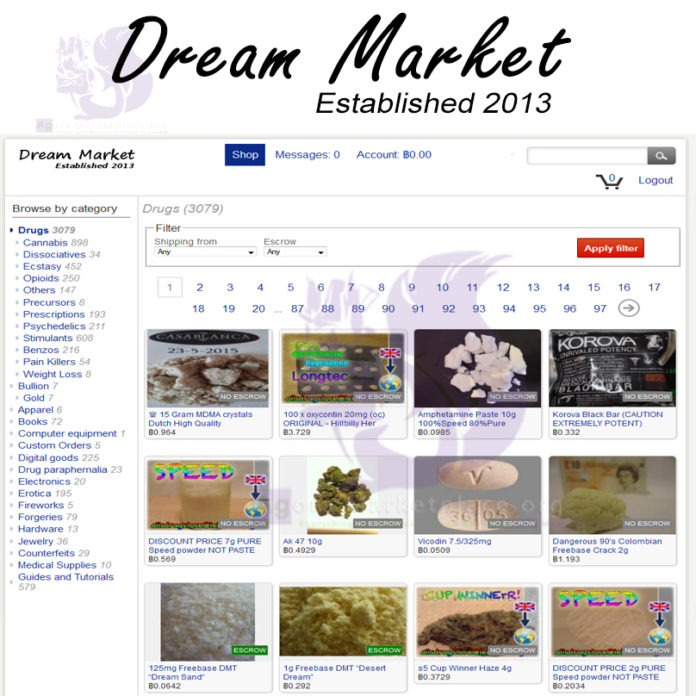

In [2]:
Image (filename="img/dream.jpg", width=1000, height=1000)

### Del sitio web al *dataset*

#### Nota

- Así es como luce un conjunto de datos. Para que las personas que no se dedican a esto puedan apreciar de lo que hablo 
cuando digo conjunto de datos, pues me refiero a un monton de datos (en realidad estos no son tantos y deberia decir que son pocos ) pero sin duda es una manera amigable de verlos como un archivo de excel de los que todo el mundo conoce.


- Ahora, estoy 100% seguro que NO se que no se lo estan preguntando pero ¿Como llegaron los datos que tenia la pagina web a este archivo con columnas y renglones? 
esto se logra utilizando una tecnica que se llama "web scrapping"  es una tecnica que se mantiene un area gris y ahorita les digo por que.

Lo que esta tecnica hace es descargarse todos los datos de un sitio web, recorre todo el sitio buscando la informacion que una persona elija, en este caso YO NO lo cree yo solo lo estoy usando pero la persona que lo creo dijo: " *voy a descargarme toda la info que tengan sobre la coca en su pagina de ventas y la voy a organizar de una forma que crea conveniente para usarla como me de la gana. (riendose asi como el chikidracula (ñaka ñaka) o cualquier persona malvada) "*

- Les dije que esta tecnica se encontraba en un area gris por que imaginense si ellos hicieron eso en una pagina de la dark web cualquier persona lo puede hacer en facebook instagram y todo eso que usa la chaviza. Obviamente los dueños de la pagina ilegal no van a ir a la policia pero muchas personas sienten que si pueden hacerlo cuando hacen lo mismo en sus redes sociales.

Entonces no es ilegal guardar una copia de los datos de cualquier pagina para uno mismo pero lo que uno haga con esos datos puede que si sea ilegal entonces mucho cuidado con lo que hagan ahora que les he concedido este magico poder.

https://www.webharvy.com/articles/is-scraping-legal.html <- aquí dice que onda con eso de lo legal.


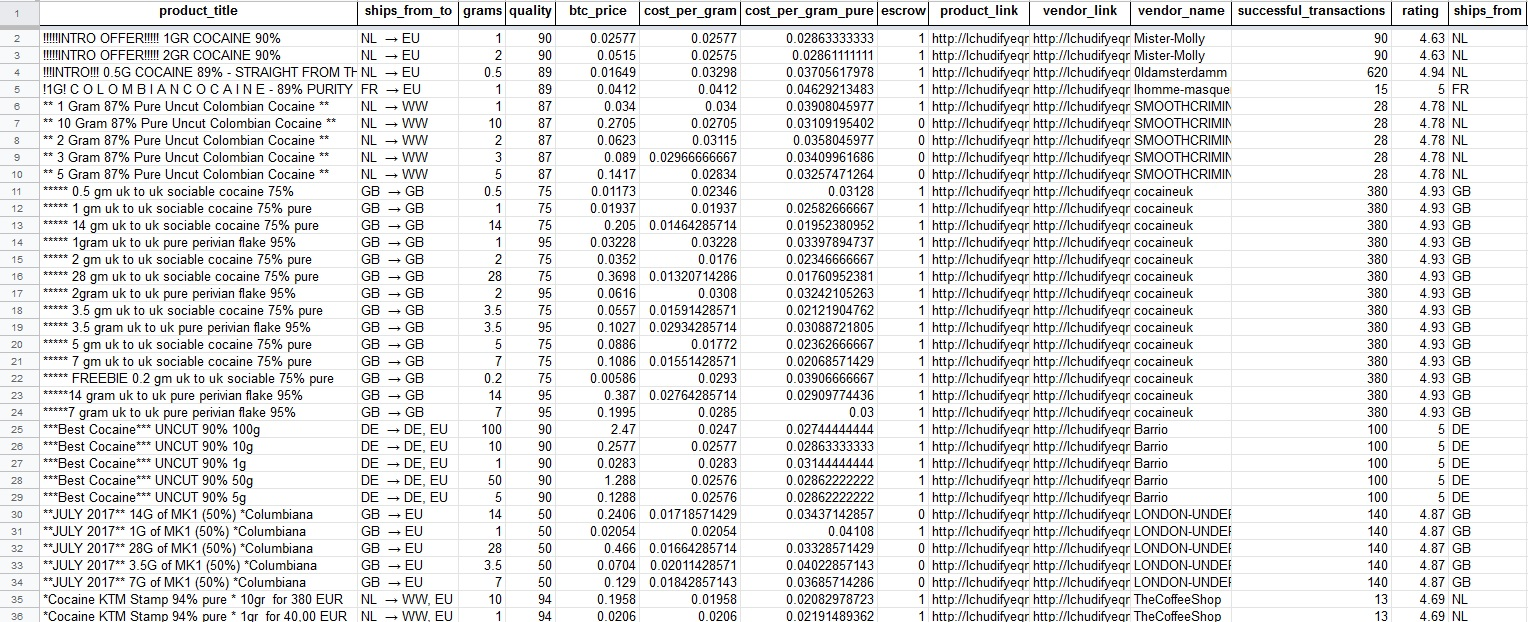

In [3]:
Image (filename="img/tabla.jpg", width=1000, height=1000)

In [4]:
perico = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv
coke = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv

In [5]:
perico.head() #resumen de los datos contenidos en el dataset. 

Unnamed: 0                                      product_title  \
0          10              !!!!!INTRO OFFER!!!!! 1GR COCAINE 90%   
1          11              !!!!!INTRO OFFER!!!!! 2GR COCAINE 90%   
2          14  !!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...   
3          20  !1G! C O L O M B I A N C O C A I N E - 89% PURITY   
4          41      ** 1 Gram 87% Pure Uncut Colombian Cocaine **   

  ships_from_to  grams  quality  btc_price  cost_per_gram  cost_per_gram_pure  \
0      NL  → EU    1.0     90.0    0.02577        0.02577            0.028633   
1      NL  → EU    2.0     90.0    0.05150        0.02575            0.028611   
2      NL  → EU    0.5     89.0    0.01649        0.03298            0.037056   
3      FR  → EU    1.0     89.0    0.04120        0.04120            0.046292   
4      NL  → WW    1.0     87.0    0.03400        0.03400            0.039080   

   escrow                                       product_link  ... ships_to_SE  \
0       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
2       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
3       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
4       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   

  ships_from_SE  ships_to_CO  ships_from_CO ships_to_CN ships_from_CN  \
0         False        False          False       False         False   
1         False        False          False       False         False   
2         False        False          False       False         False   
3         False        False          False       False         False   
4         False        False          False       False         False   

   ships_to_PL  ships_from_PL  ships_to_GR  ships_from_GR  
0        False          False        False          False  
1        False          False        False          False  
2        False          False        False          False  
3        False          False        False          False  
4        False          False        False          False  

[5 rows x 64 columns]

### Información del *dataset* 

In [6]:
print (perico.columns) 
print ("Total de columnas:",len (perico.columns))
print ("Total de renglones:", len(perico))

Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

## Selección de variables 

El Conjunto de datos está compuesto por 64 columnas y 1504 renglones. 
Se pueden ver algunas variables con nombres que describen vagamente el contenido de sus columnas pero es necesario desglosarlas para saber que técnicas y tratamientos se pueden aplicar.

- Más variables no necesariamente implica un mejor resultado al crear un modelo para analizar los datos.

#### Nota

- En esta parte es donde elegimos cualques son las variables importantes, aveces en un conjunto de datos gracias a la forma en la que estan organizadas las columnas y los renglones podemos saber de que se trata todo.

Pero hay veces en las que a la gente le vale y le pone titulos a las columnas que no tienen nada que ver con el valor de los renglones o hay un monton de valores inexistentes cositas que hacen de verdad el trabajo muy dificil para poder analizarlo.




## Descripción de las variables 

#### 'product_title'
Contiene una breve descripción del producto que el usuario vende
#### 'ships_from_to'
De donde Proviene y a donde se envía
#### 'grams'
Cantidad de gramos que un vendedor envía
Algunos vendedores se anuncian como *"0.5G COCAINE 89% "*  y otros *"10 Gram 87% Pure Uncut Colombian Cocaine" *
#### 'quality'
La calidad de la cocaína que venden, como ejemplo, la denominada "Yen” es más pura (roza el 98%) y más blanca, escamosa y brillante. Ahora bien, existen otros tipos de cocaína en polvo con menos pureza, en la que su presentación es más polvorienta y con menor brillo. Esto ocurre porque para su comercialización se añaden una serie de sustancias químicas que pueden ser altamente tóxicas. Cuantas menos sustancias incorpore más pura es la coca y es considerada de mayor calidad.


#### 'btc_price'
Precio en bitcoins del producto que venden
#### 'cost_per_gram'
Costo por gramo de coca no pura 
#### 'cost_per_gram_pure'
Costo por gramo de coca pura
#### 'product_link'
Enlace al producto
#### 'vendor_link'
Enlace al vendedor 
#### 'vendor_name'
Nombre del vendedor
#### 'successful_transactions'
Número de transacciones exitosas
#### 'rating'
Calificación del vendedor 
#### 'ships'
El resto de las variables que aparecen en el dataset estan relacionadas con información geográfica que indica específicamente desde donde se esta enviando el producto y hacia a donde se envía, parecen redundantes por la forma en la fue creado el dataset pero aun así se puede trabajar con ellas

### Conocimiento del problema

Una vez analizado el conjunto de datos se han detectado 5 rasgos que han resultado sumamente importantes para comprender y determinar el comportamiento de los usuarios en el sitio de la *Dark web*.
- Principales involucrados.
- Factores que influyen en el precio del producto
- Calidad
- Cantidad
- Vendedores

#### Nota

- Lo que puse sobre "conocimiento del problema" es por que previamente he realizado un monton de versiones de esta libreta y analizado los datos para saber que esos 5 puntos son los mas reelevantes.


- Esta parte es basicamente estadistica basica pero se impresionaran con lo que se puede obtener de un sitio que se supone 
deberia estar protegido por todos lados para que no atrapen a nadie.
Es precisamente por eso que los atrapan como yo lo veo no son ni la mitad de inteligentes de lo que creen que son, o tal vez si lo son y los que no saben nada son los policias que se dedican a atrapar a esa gente o tal vez no quieren atraparlos, quien sabe ustedes inventense su propia teoria alucin así de ese estilo.


### Principales involucrados ¿Quiénes son los más afectados?

#### Nota

- Aquí les voy a mostrar con un mapa interactivo que muestra de sopeton unas areas coloreadas, se llama mapa de calor y 
basicamente donde se vea mas caliente es donde esta la mata.


- Lo interesante aqui es que el mapa fue creado directamente con la información del dataset que vieron en el excel


In [163]:
dat = perico.loc[:,["ships_from","ships_to","cost_per_gram","cost_per_gram_pure"]].copy()
lat=pd.Series([])
long=pd.Series([])
amount=pd.Series([])

C:\Users\ld_ex\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\ld_ex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\ld_ex\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [8]:
for i in range(len(dat)): 
    
    if dat["ships_from"][i] == "NL": 
        lat[i]="52.370216"
        long[i]= "4.895168"
        amount[i]="496"
        
    elif dat["ships_from"][i] == "DE": 
        lat[i]="51.1656914"
        long[i]= "10.4515257"
        amount[i]="376"
        
    elif dat["ships_from"][i] == "AU": 
        lat[i]="-25.2743988"
        long[i]= "133.7751312"
        amount[i]="40"
        
    elif dat["ships_from"][i] == "FR": 
        lat[i]="46.2276382"
        long[i]= "2.2137489"
        amount[i]="70"
        
    elif dat["ships_from"][i] == "BR": 
        lat[i]="-23.5475006"
        long[i]= "-46.6361084"
        amount[i]="5"
        
    elif dat["ships_from"][i] == "US": 
        lat[i]="37.0902405"
        long[i]= " -95.7128906"
        amount[i]="112"
        
    elif dat["ships_from"][i] == "GB": 
        lat[i]="55.3780518"
        long[i]= "-3.4359729"
        amount[i]="251"
        
    elif dat["ships_from"][i] == "BE": 
        lat[i]="50.5038872"
        long[i]= "4.4699359"
        amount[i]="25"
        
    elif dat["ships_from"][i] == "CA": 
        lat[i]="56.13036732"
        long[i]= "-106.3467712"
        amount[i]="19"
        
    elif dat["ships_from"][i] == "ES": 
        lat[i]="40.4636688"
        long[i]= "-3.7492199"
        amount[i]="11"
        
    elif dat["ships_from"][i] == "IT": 
        lat[i]="42.8333000"
        long[i]= "12.8333000"
        amount[i]="7"
        
    elif dat["ships_from"][i] == "SE": 
        lat[i]="60.1281624"
        long[i]= "18.6435013"
        amount[i]="1"
        
    elif dat["ships_from"][i] == "CN": 
        lat[i]="35.86166"
        long[i]= "104.1953964"
        amount[i]="1"
    
    elif dat["ships_from"][i] == "CH": 
        lat[i]="46.8181877"
        long[i]= "8.2275124"
        amount[i]="1"
    
    elif dat["ships_from"][i] == "CZ": 
        lat[i]="49.8174934"
        long[i]= "15.4729624"
        amount[i]="1"
    
dat.insert(2,"lat",lat)
dat.insert(2,"long",long)
dat.insert(2,"amount",amount)

In [9]:
latitude=pd.to_numeric (lat)
longitude=pd.to_numeric (long)
cantidad=pd.to_numeric(amount)
dat.insert(2,"latitude",latitude)
dat.insert(2,"longitude",longitude)
dat.insert(2,"cantidad",cantidad)

In [10]:
gdf = gpd.GeoDataFrame(
    dat, geometry=gpd.points_from_xy(dat.longitude,dat.latitude))

In [11]:
data2 = dat.loc[:, ["ships_from", "ships_to", "geometry","long", "lat","cantidad","cost_per_gram","cost_per_gram_pure"]].copy()
data2.dropna(inplace=True)

### ¿Quién vende mas cocaina en la dark web?

In [12]:
hmap=folium.Map(location=[40, 5], tiles='Stamen Terrain', zoom_start=2)
folium.CircleMarker(
    location=[52.37022,4.89517],
    radius=18,
    popup='Países Bajos:496 envios',
    color='#3186cc',
    fill=True,
).add_to(hmap)
folium.CircleMarker(
    location=[51.1656914,10.45153],
    radius=14,
    popup='Alemania:376 envios',
    color='#3186cc',
    fill=True,
).add_to(hmap)

folium.CircleMarker(
    location=[55.37805,-3.43597],
    radius=10,
    popup='Gran Bretaña:251 envios',
    color='#3186cc',
    fill=True,
).add_to(hmap)

folium.CircleMarker(
    location=[37.09024,-95.71289],
    radius=10,
    popup='Estados Unidos:112 envios',
    line_color='#3186cc',
    Color='#3186cc',
   
).add_to(hmap)
hm_wide=HeatMap(list(zip(data2.lat.values,data2.long.values, data2.cantidad.values)),
                min_opacity=0.7,
                radius=17, blur=18,                                              
               )
hmap.add_child(hm_wide)

#### Nota

- Entonces con los datos pudimos crear un mapa que muestra que países son los que estan metidos en la droga
gracias a dios en mi México lindo y querido no tenemos un problema con la droga ni en colombia (mas adelante les digo por que)


- Si fueramos policias ya tendriamos nuestra primera pista, *a mí me gusta creer que soy como el muchacho ese de los expedientes secretos X sientanse libres de sentirse como les de la gana mientras leen esta libreta*


- Entonces ya podemos ver que en Europa hay mucho movimiento, el mapa esta hecho de tal manera que puedan darle zoom y ver exactamente que paises son los involucrados y que cantidad de envios hace cada pais.

(A los que tienen mas actividad les pueden dar click y mostraran cuantos envios hace cada país ).



In [13]:
value_counts=dat.ships_from.value_counts()
value_counts.rename_axis('países').reset_index(name='ventas')
df_val_counts = pd.DataFrame(value_counts) 
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['ships_from', 'cantidad_envios']


#### Nota

- Si no son tanto de los que ven mapas y les gusta la información directa aqui van a poder ver una grafica de barras
como esas que salen ahora en el covid-19 diseñadas para que todo mundo las entienda 


- Tambien se van a dar cuenta por que en el mapa sale mas movimiento en Europa y en general cuales son todos los países que participan en este negocio



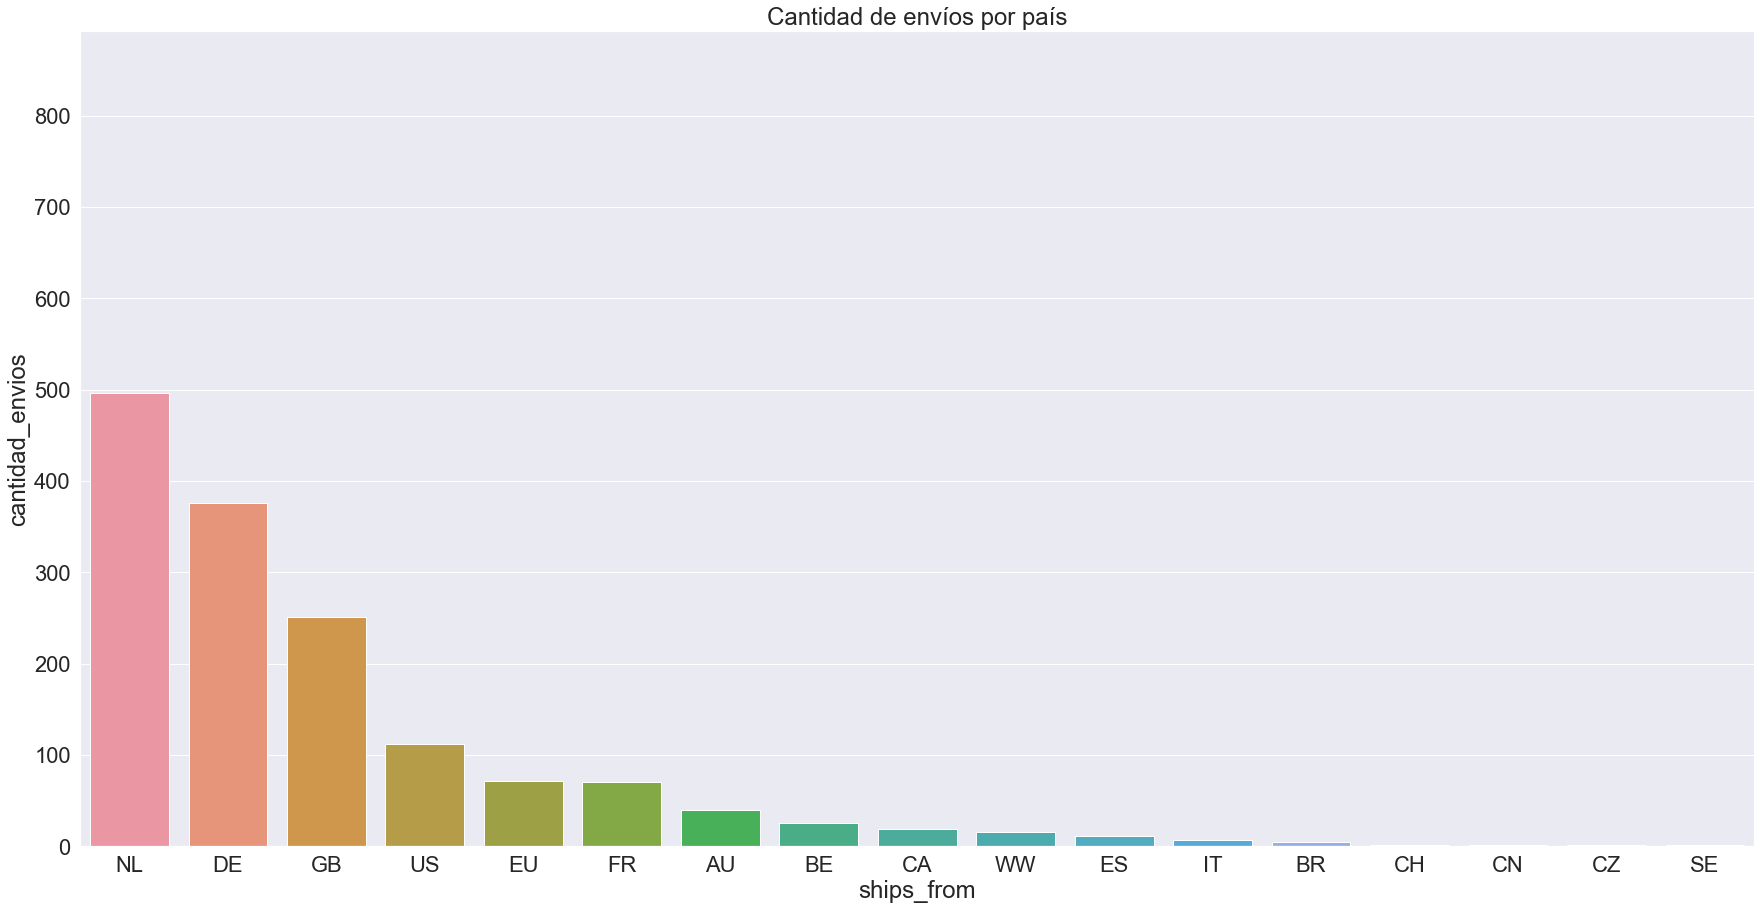

In [14]:
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
plt.margins(0.8)
plt.title('Cantidad de envíos por país')
sns.barplot (x=df_value_counts['ships_from'], y=df_value_counts['cantidad_envios']) 


¿Por qué son ellos los principales vendedores?
- No son productores como Colombia o México.

¿De donde obtienen toda la droga que venden?

¿Por qué no aparecen los principales productores?
- Colombia y México no se ven afectados por la venta de droga por internet.



Comportamiento según *United Nations Office on Drugs and Crime (UNODC).*  Año 2013- 2017
https://wdr.unodc.org/wdr2019/prelaunch/WDR19_Booklet_1_EXECUTIVE_SUMMARY.pdf

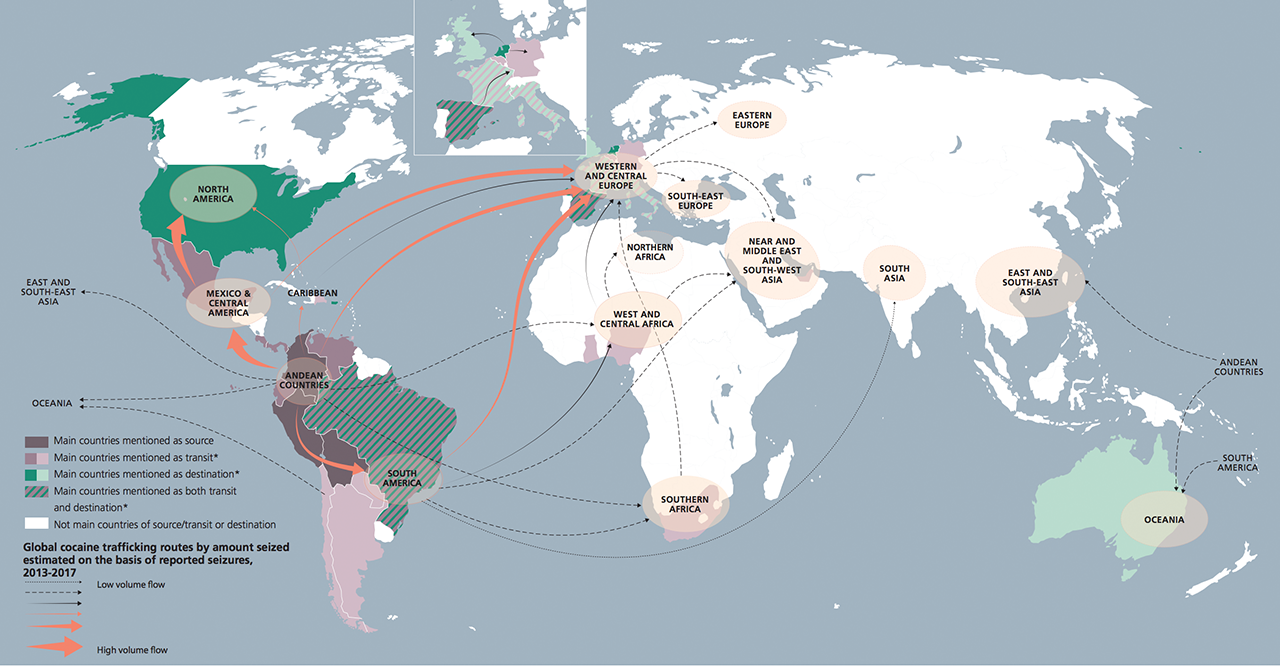

In [15]:
Image (filename="img/envios_coc.png", width=1000, height=1000)

#### NOTA

- Como cualquier analista de datos y mas que nada investigador de los expedientes secretos X cuando los datos no concuerdan con la realidad es necesario hacer un poco de investigacíon

En la sección de arriba les decia que no aparecia México y Colombia que claramente son sinonimos de cocaina, ahora les dire 
por que no salen.

- La imagen del mapa es un mapa como el de calor que yo hice pero este lo hizo la oficina de las naciones unidas sobre drogas y crimen (UNODC) y muestra precisamente por que no aparecen los productores y por que en Europa hay tanto movimiento


1. los productores no participan en la pagina de la dark web por que en las paginas venden por menudeo, que un gramito pal cafe que dos gramitos que un kilito pal pastel y maximo 5 kilogramos es lo que vi que vendian. 
los paises productores mueven el producto en toneladas por una infraestructura fisica que ya han creado por años entonces no pierden el tiempo en internet con tantas vulnerabilidades.


2. En el mapa hay categorias de paises, unos son paises destino otros son de transito y por ultimo de transito-destino. 
Entonces en mi mapa se ve que en Europa hay bastante movimiento, eso es por que es un pais destino. Los grandes productores envian la droga a Europa y una vez enviada se vende por menudeo (pero muy cara).


Entonces ahora ya saben muchas  cosas y al final de esta libreta van a sentir que afuera de sus casas esta una camioneta parada como en breaking bad o la paranoia a todo lo que da. pero no he terminado aun tengo o tenemos (así  para que se sientan que son mis cuates y estamos en esto juntos.) que llegar al fondo de todo este asunto.

### Calidad y cantidad

- La calidad de la cocaína se refiere a la pureza que posee. En las calles la calidad de la cocaína esta directamente relacionada con el precio. 


- Es importante resaltar que la estructura de la venta de drogas por internet no fue diseñada para traficar "al mayoreo",
  generalmente son cantidades pequeñas las que se venden debido a que en la mayoría de los casos el método utilizado      para enviarla es el correo común y corriente.



### Calidad promedio

In [16]:
calidad_promedio =perico['quality'].mean()
calidad_moda =perico['quality'].mode()

In [17]:
print ("Calidad promedio", calidad_promedio)
print ("Calidad moda", calidad_moda)

Calidad promedio 88.52646276595746
Calidad moda 0    90.0
dtype: float64


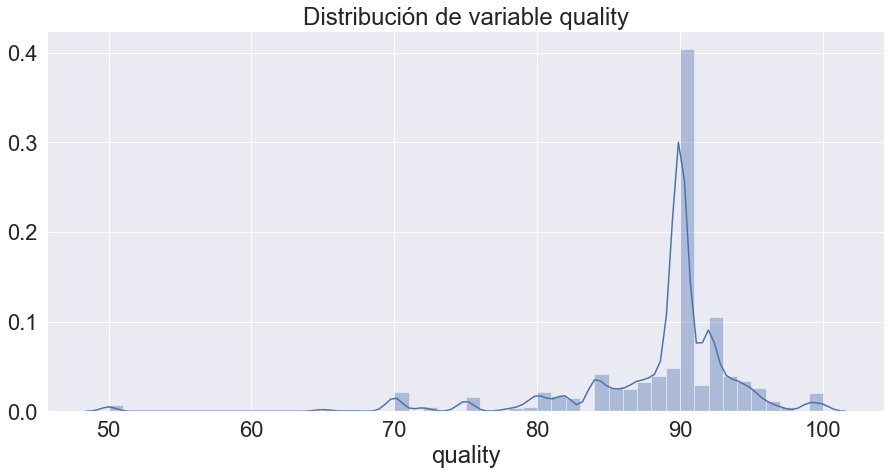

In [18]:
plt.figure(figsize=(15,7))
plt.title('Distribución de variable quality')
sns.distplot (perico['quality'])

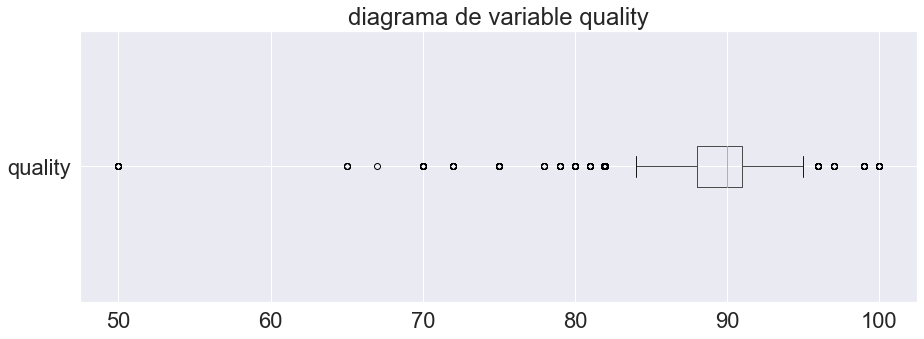

In [19]:
plt.figure(figsize=(15, 5))
plt.title('diagrama de variable quality')
perico.boxplot(column=['quality'], grid = True,vert=False)

In [20]:
cantidad_promedio =perico['grams'].mean()
cantidad_moda =perico['grams'].mode()
print ("Cantidad promedio", cantidad_promedio)
print ("Cantidad moda", cantidad_moda)

Cantidad promedio 59.06216090425532
Cantidad moda 0    1.0
dtype: float64


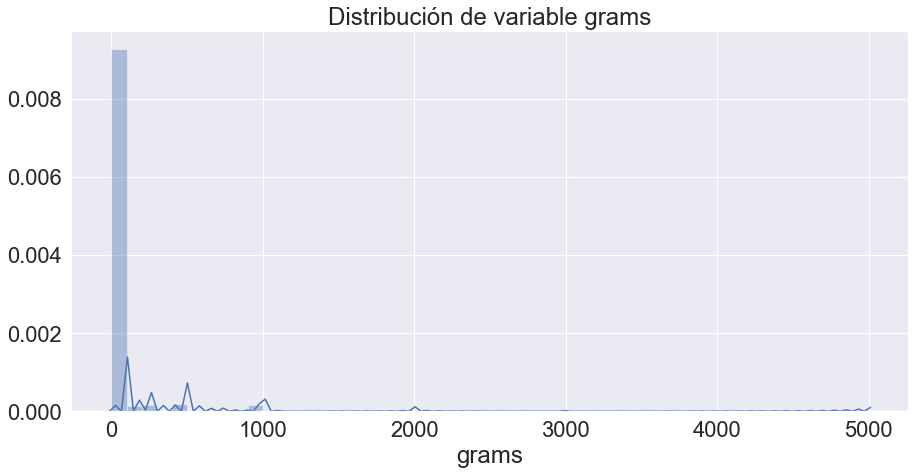

In [21]:
plt.figure(figsize=(15,7))
plt.title('Distribución de variable grams')
sns.distplot (perico['grams'])

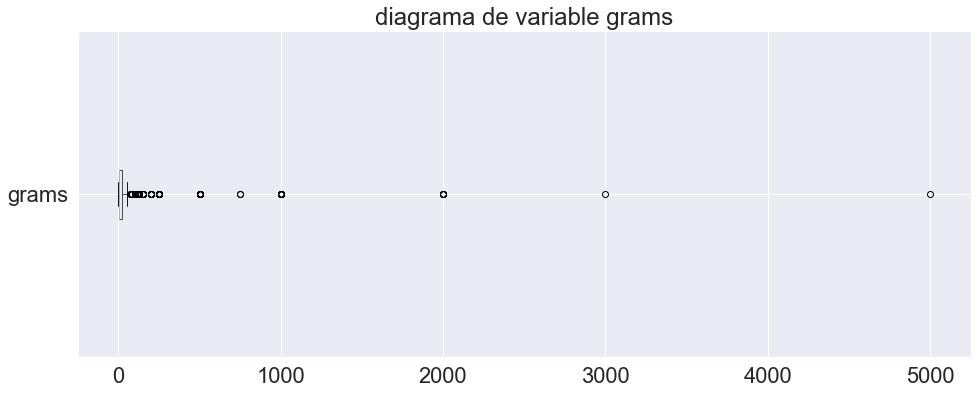

In [22]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable grams')
perico.boxplot(column=['grams'], grid = True,vert=False)

#### NOTA

- Les voy a resumir toda esa parte, en general en la pagina de la dark web la calidad de la droga que venden es muy buena segun ellos del 90% de pureza.


Otra cosa muy rara es que en general en el sitio se vende poco la cantidad moda es de 1 gramo, y pues tomando en cuenta que la droga la mandaban por el correo normal un gramo como quiera lo escondes, pero habia gente que mandaba 5 kg. Ese fue el maximo y no se a ustedes pero a mi me da mucha curiosidad saber como la mandaban, es uno de esos misterios sin resolver

### ¿Cuánto cuesta?, ¿Dónde es mas costosa?, ¿Qué factores influyen en el precio?

In [23]:
precioso=data2.groupby('ships_from', as_index=False)['cost_per_gram'].mean()
latitudes=[-25.2743988,50.5038872,-23.5475006,56.13036732,46.8181877,35.86166,49.8174934,51.1656914,40.4636688,
          46.2276382,55.3780518,52.370216,60.1281624,37.0902405]

longitudes=[133.7751312,4.4699359,-46.6361084,-106.3467712,8.2275124,104.1953964,15.4729624,10.4515257 ,-3.7492199,
           2.2137489,-3.4359729,4.895168,18.6435013,-95.7128906]

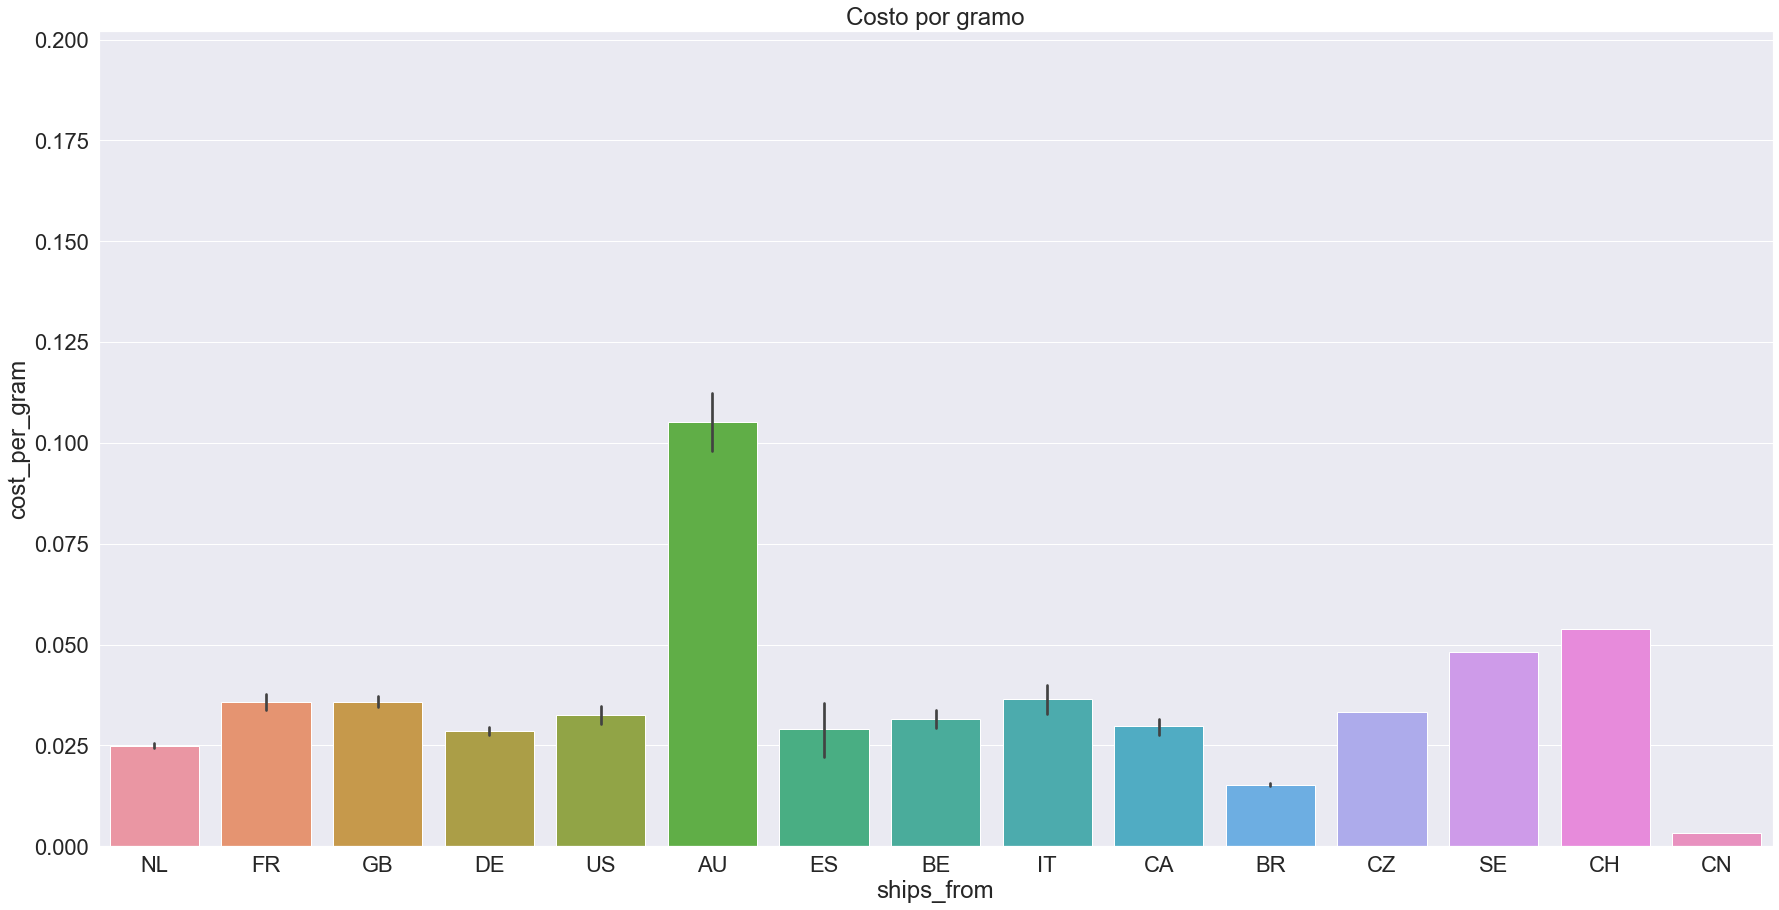

In [24]:
#sns.set(font_scale=2)
plt.figure(figsize=(30,15))
plt.margins(0.8)
plt.title('Costo por gramo')
sns.barplot (x=data2['ships_from'], y=data2['cost_per_gram']) 


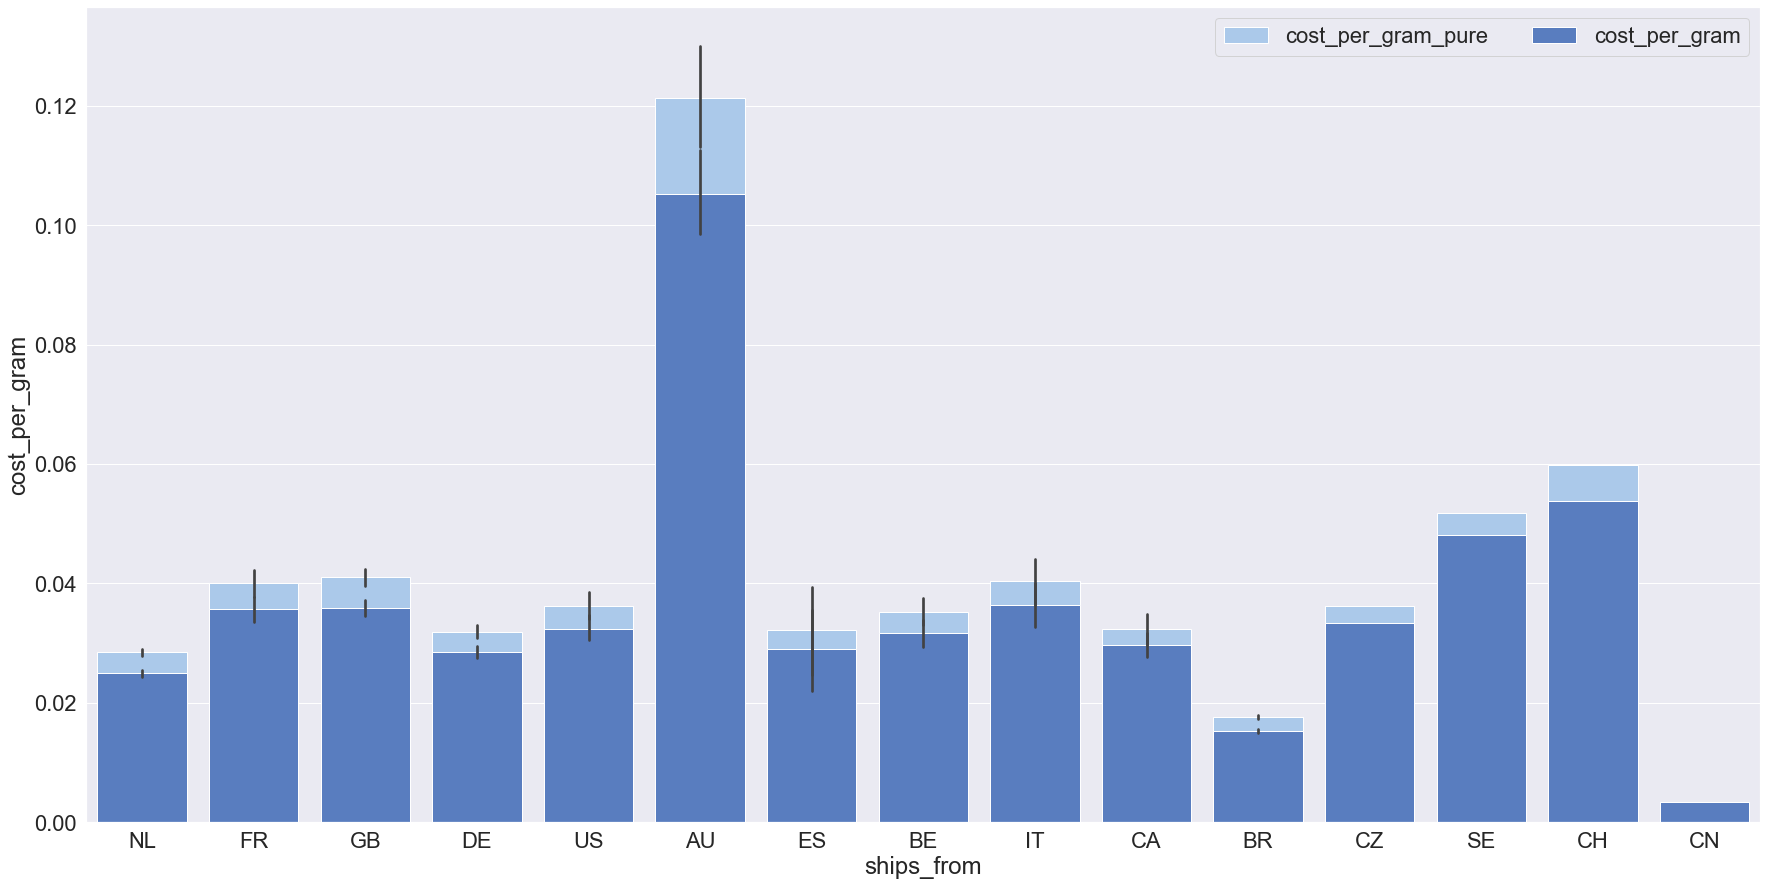

In [25]:
sns.set(font_scale=2)

f, ax = plt.subplots(figsize = (30,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'ships_from', y = 'cost_per_gram_pure', data = data2,
            label = 'cost_per_gram_pure', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'ships_from', y = 'cost_per_gram', data = data2,
            label = 'cost_per_gram', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
plt.show()

In [26]:
precioso["ships_from"].replace({"IT":"ITA","AU": "AUS", "BE": "BEL","BR":"BRA","CA":"CAN","CH":"CHE","CN":"CHN","CZ":"CZE","DE":"DEU","ES":"ESP","FR":"FRA","GB":"GBR","NL":"NLD","SE":"SWE","US":"USA"}, inplace=True)

In [27]:
mgrams=coke.groupby("successful_transactions").mean()
mgrams.head()

Unnamed: 0        grams  quality  btc_price  \
successful_transactions                                                 
1                        2881.160000    14.320000    87.68   0.327280   
2                        3554.000000  1000.000000    99.00   3.350000   
4                        1557.454545    19.654545    90.00   0.455755   
5                        1930.666667     8.500000    86.00   0.220567   
7                        2887.166667     9.083333    82.50   0.297150   

                         cost_per_gram  cost_per_gram_pure  escrow  rating  \
successful_transactions                                                      
1                             0.025612            0.029168    0.68     5.0   
2                             0.003350            0.003384    1.00     5.0   
4                             0.027339            0.030377    1.00     5.0   
5                             0.028082            0.032654    1.00     4.8   
7                             0.038689            0.046658    1.00     5.0   

                         ships_to_US  ships_from_US  ...  ships_to_SE  \
successful_transactions                              ...                
1                                0.0       0.000000  ...          0.0   
2                                0.0       0.000000  ...          0.0   
4                                0.0       0.000000  ...          0.0   
5                                0.0       0.000000  ...          0.0   
7                                0.0       0.833333  ...          0.0   

                         ships_from_SE  ships_to_CO  ships_from_CO  \
successful_transactions                                              
1                                 0.04          0.0            0.0   
2                                 0.00          0.0            0.0   
4                                 0.00          0.0            0.0   
5                                 0.00          0.0            0.0   
7                                 0.00          0.0            0.0   

                         ships_to_CN  ships_from_CN  ships_to_PL  \
successful_transactions                                            
1                                0.0            0.0          0.0   
2                                0.0            1.0          0.0   
4                                0.0            0.0          0.0   
5                                0.0            0.0          0.0   
7                                0.0            0.0          0.0   

                         ships_from_PL  ships_to_GR  ships_from_GR  
successful_transactions                                             
1                                  0.0          0.0            0.0  
2                                  0.0          0.0            0.0  
4                                  0.0          0.0            0.0  
5                                  0.0          0.0            0.0  
7                                  0.0          0.0            0.0  

[5 rows x 56 columns]

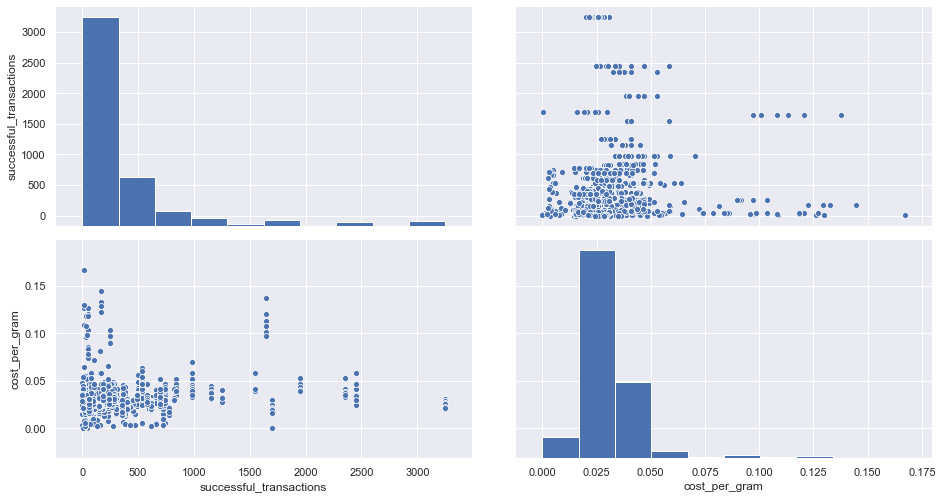

In [28]:
sns.set(font_scale=1)

g=sns.pairplot(coke, vars=["successful_transactions", "cost_per_gram"])
g.fig.set_size_inches(14,7)

In [29]:
#table = pd.crosstab (coke.successful_transactions, coke.escrow)
#table.div (table.sum(1).astype (float ), axis =0).plot (kind ="bar", stacked = True)
#coke.plot(figsize=(20,10));



### Precio de la cocaina alrededor del mundo (Dream Market)

In [30]:
import plotly.express as px
df = precioso
fig = px.choropleth(df, locations="ships_from",
                    color="cost_per_gram", 
                    hover_name="ships_from",
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    title_text='2017 Costo por gramo (Dream market)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Enlace a los datos: <a href="https://docs.google.com/spreadsheets/d/14GbheDtl0a1uXZ4SJiy3rH93t4RUTv5IVhxSMHbJ7yU/edit#gid=275616560">\
            Dream market</a>',
        showarrow = False
    )]
),
fig.show()

### El caso de Australia

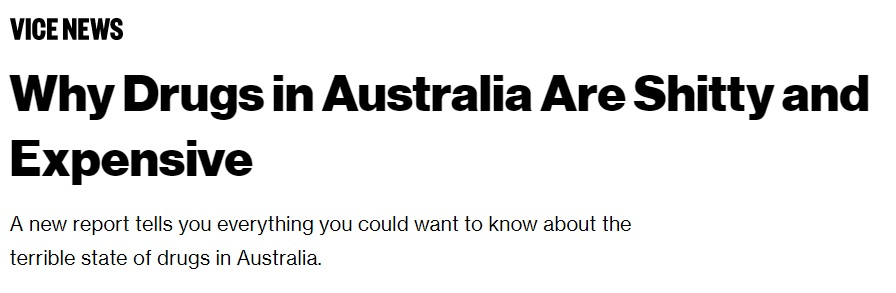

In [32]:
Image (filename="img/australia.jpg", width=700, height=700)

“Getting anything through customs is really hard. They’ve got really strict border control”

#### Nota

Otra vez les voy a resumir, en general el precio se podria decir que esta parejo.

El caso de Australia es el mas raro por lo que debemos (osea que yo tengo que) investigar que pasa 
Es muy dificil transportar la droga hasta Australia y crear una red de distribución por lo que no hay mucha y el precio aumenta.


### precio de la cocaina deacuerdo con los datos de  las naciones unidas 

https://dataunodc.un.org/drugs/prices-2017

### Principal causa de precio elevado.

- En los paises productores como colombia el precio de la cocaina por gramo es de aproximadamente 1.5 Euros -> 32.34 Pesos.

- Para ser exportada tiene que irse a venezuela, solo por cruzar la frontera el precio  en venezuela sube a 6 Euros -> 125.38 Pesos.

- Una vez que cruza el atlantico, en Barcelona (España) el precio sube a 40 Euros -> 835.92 Pesos.

- Finalmente fuera de ella  sube a 80 euros -> 1721.29 pesos



 hasta este momento se ha observado el comportamiento de los datos a grandes rasgos, que en verdad resuelve bastantes dudas 
se ha podido contestar bastantes preguntas pero que hay mas alla de la informacion que se muestra en las imagenes con las preguntas que contestamos? como saber como se comportan los vendedores? 

### *Machine learning*
#### Aprendizaje supervisado 
El aprendizaje supervisado ​​son un conjunto de técnicas que permite realizar predicciones futuras basadas en comportamientos o características analizadas en datos históricos etiquetados.

#### Aprendizaje no supervisado 
Aprendizaje no supervisado es un método de Aprendizaje Automático donde un modelo se ajusta a las observaciones. Se distingue del Aprendizaje supervisado por el hecho de que no hay un conocimiento a priori.

#### NOTA

Aqui comienza lo bueno pero ya no tengo tiempo de seguir poniendo notas, luego que termine lo de deep learning le sigo

*si tienen tele ahi se ven*

### Procesamiento de datos

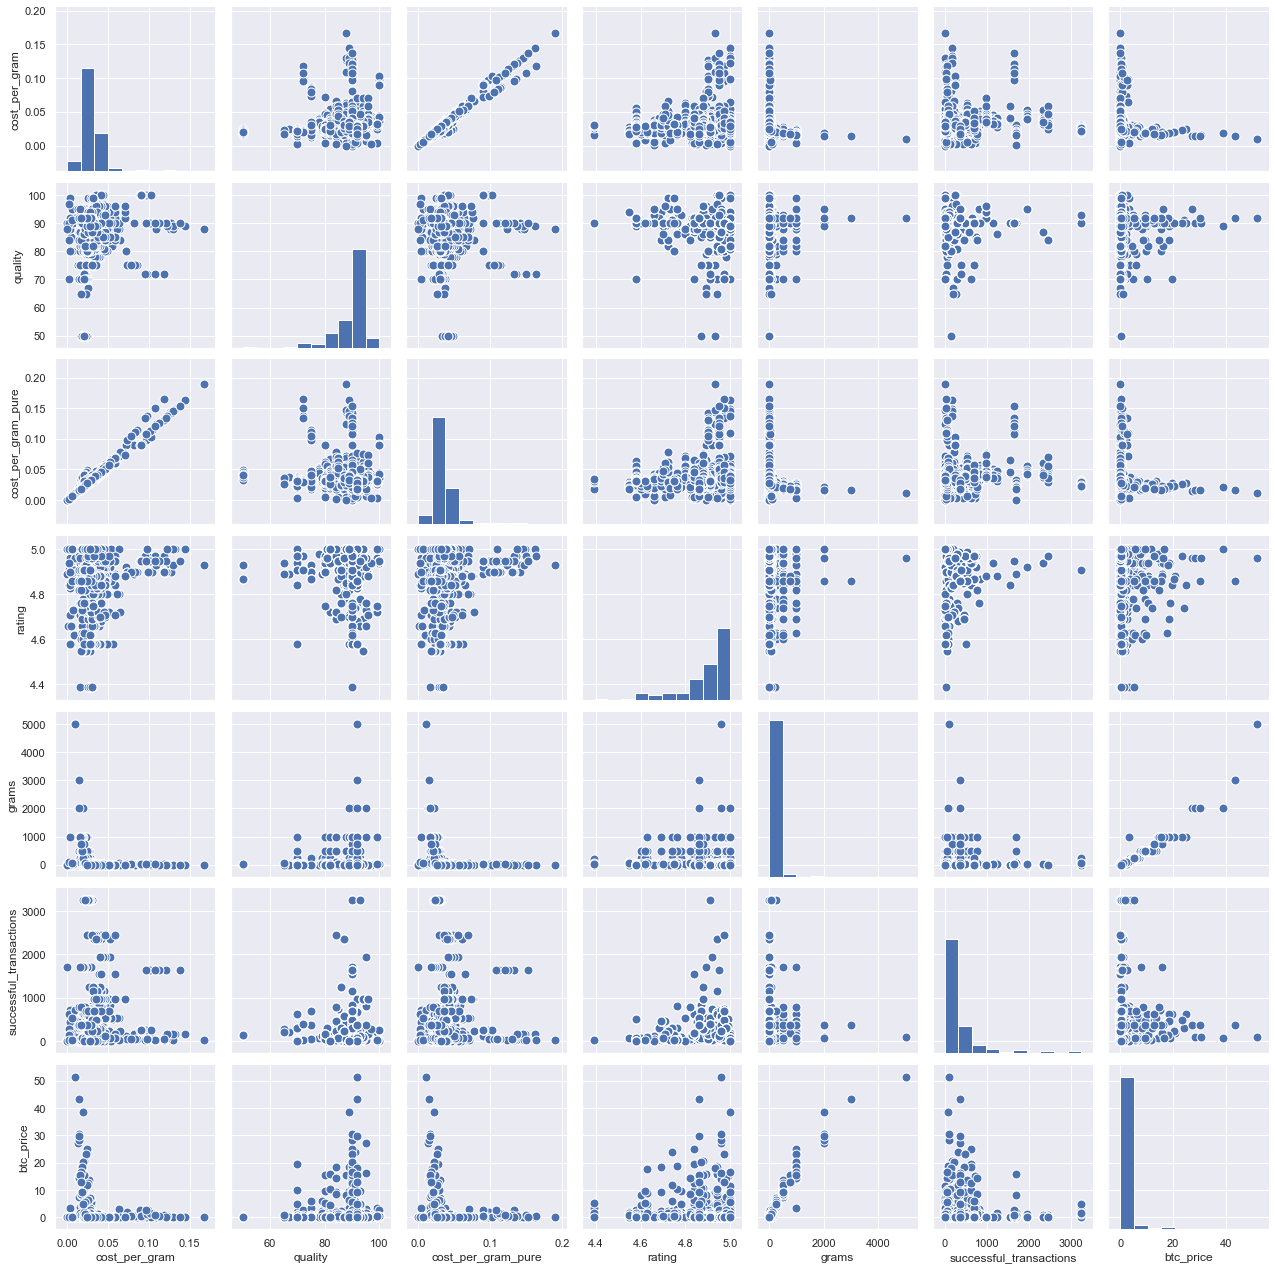

In [33]:
sns.set(font_scale=1)
g = sns.PairGrid(perico, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=80)

In [34]:
datoscoke = perico.loc[:, ["cost_per_gram","ships_from","cost_per_gram_pure","quality","rating","grams","vendor_name","successful_transactions","escrow","btc_price"]].copy()
datoscoke=datoscoke.copy()

In [35]:
#datoscoke.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


una vez que se ha pasado todo el tormento de la transportacion y ya la droga se encuentra en sus centros de distribucion 
que es lo que afecta el precio para los compradores directamente en la dark web?


In [36]:
datoscoke["ships_from"].replace({"NL": 1,"FR": 2, "GB": 3, "DE": 4, "US":5,"EU":6,"AU":7,"BE":8,"CA":9,"WW":10,"ES":11, "IT":12,"BR":13,
                                "CN":14,"CZ":15,"CH":16,"SE":17}, inplace=True)


In [37]:
datoscoke.corr()

cost_per_gram  ships_from  cost_per_gram_pure  \
cost_per_gram                 1.000000    0.248025            0.985784   
ships_from                    0.248025    1.000000            0.236538   
cost_per_gram_pure            0.985784    0.236538            1.000000   
quality                       0.082540    0.110310           -0.064907   
rating                        0.121977    0.167964            0.126917   
grams                        -0.178628   -0.017938           -0.178273   
successful_transactions       0.063822   -0.047176            0.051564   
escrow                       -0.170052   -0.100459           -0.170629   
btc_price                    -0.171318   -0.044518           -0.170636   

                          quality    rating     grams  \
cost_per_gram            0.082540  0.121977 -0.178628   
ships_from               0.110310  0.167964 -0.017938   
cost_per_gram_pure      -0.064907  0.126917 -0.178273   
quality                  1.000000 -0.055191  0.030695   
rating                  -0.055191  1.000000  0.009282   
grams                    0.030695  0.009282  1.000000   
successful_transactions  0.053754  0.062433 -0.012006   
escrow                   0.031008 -0.037400 -0.148276   
btc_price                0.027096  0.000539  0.960451   

                         successful_transactions    escrow  btc_price  
cost_per_gram                           0.063822 -0.170052  -0.171318  
ships_from                             -0.047176 -0.100459  -0.044518  
cost_per_gram_pure                      0.051564 -0.170629  -0.170636  
quality                                 0.053754  0.031008   0.027096  
rating                                  0.062433 -0.037400   0.000539  
grams                                  -0.012006 -0.148276   0.960451  
successful_transactions                 1.000000 -0.029527  -0.008213  
escrow                                 -0.029527  1.000000  -0.159067  
btc_price                              -0.008213 -0.159067   1.000000

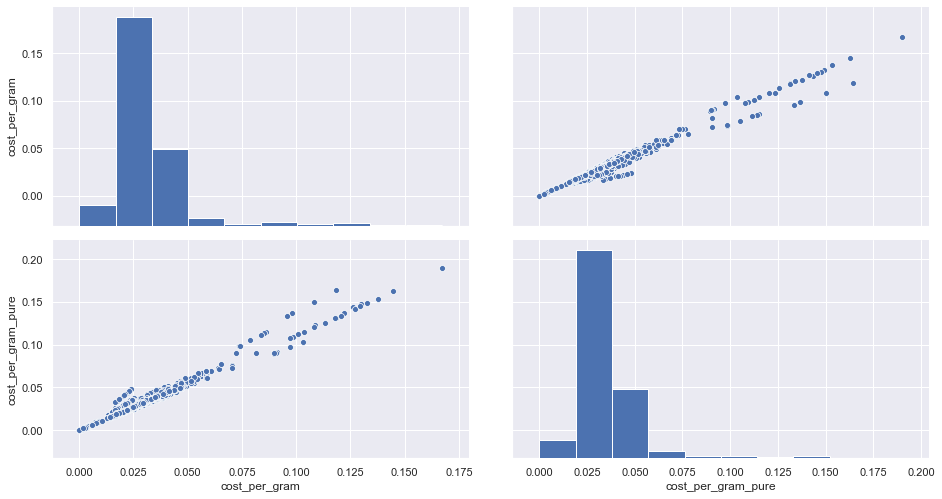

In [38]:
g=sns.pairplot(datoscoke, vars=["cost_per_gram", "cost_per_gram_pure"])
g.fig.set_size_inches(14,7)

### Machine learning

#### Aprendizaje supervisado

El aprendizaje supervisado se basa en un conjunto de técnicas que permite realizar predicciones futuras basadas en comportamientos o características analizadas en datos históricos etiquetados.

### Modelo de regresión 

#### Regresión lineal simple para predecir precio de la cocaina

In [39]:
lm = smf.ols ( formula = "cost_per_gram ~ cost_per_gram_pure", data = datoscoke).fit()


In [40]:
lm.params

Intercept             0.000741
cost_per_gram_pure    0.862110
dtype: float64

In [41]:
lm.pvalues

Intercept             9.160752e-07
cost_per_gram_pure    0.000000e+00
dtype: float64

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 5.170e+04
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        05:46:49   Log-Likelihood:                 6763.9
No. Observations:                1504   AIC:                        -1.352e+04
Df Residuals:                    1502   BIC:                        -1.351e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0007      0.000      4.929      0.000       0.000       0.001
cost_per_gram_pure     0.8621      0.004    227.384      0.000       0.855       0.870
==============================================================================
Omnibus:                     1051.362   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29489.955
Skew:                          -2.876   Prob(JB):                         0.00
Kurtosis:                      23.916   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
coca_pred=lm.predict(pd.DataFrame(datoscoke["cost_per_gram_pure"]))


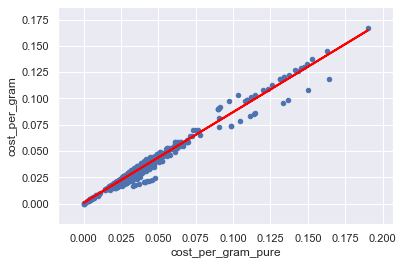

In [44]:
datoscoke.plot(kind="scatter",x="cost_per_gram_pure", y="cost_per_gram")
plt.plot(pd.DataFrame(datoscoke["cost_per_gram_pure"]),coca_pred, c="red", linewidth=2)

### Modelo de regresión múltiple  para predecir el costo por gramo 
- Costo por gramo puro
- Rating 
- Calidad 
- Cantidad de gramos 

In [45]:
lm3 = smf.ols(formula = "cost_per_gram ~  grams+ships_from + quality + cost_per_gram_pure + rating", data=datoscoke).fit()

In [46]:
lm3.params

Intercept            -3.690500e-02
grams                -3.996536e-07
ships_from           -3.048037e-05
quality               3.891745e-04
cost_per_gram_pure    8.699980e-01
rating                6.227600e-04
dtype: float64

In [47]:
lm3.pvalues

Intercept             1.812895e-113
grams                  5.396242e-03
ships_from             4.083879e-02
quality                0.000000e+00
cost_per_gram_pure     0.000000e+00
rating                 2.840579e-02
dtype: float64

In [48]:
lm3.rsquared

0.9933983538512833

In [49]:
coca_preds3=lm3.predict(datoscoke[["grams","ships_from","quality","cost_per_gram_pure","rating"]])

In [50]:
coca_preds3.head()

0    0.025884
1    0.025864
2    0.033016
3    0.041058
4    0.033899
dtype: float64

In [51]:
SSD= sum((datoscoke["cost_per_gram"]-coca_preds3)**2)

In [52]:
RSE = np.sqrt(SSD/(len(datoscoke)-2-1))

In [53]:
RSE

0.0013047089922037555

In [54]:
cpgmean = np.mean(datoscoke["cost_per_gram"])
cpgmean

0.031017177200992643

In [55]:
error2=RSE/cpgmean

In [56]:
error2

0.04206407900206989

In [57]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.508e+04
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        05:46:50   Log-Likelihood:                 7856.6
No. Observations:                1504   AIC:                        -1.570e+04
Df Residuals:                    1498   BIC:                        -1.567e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0369      0.001    -24.725      0.000      -0.040      -0.034
grams              -3.997e-07   1.43e-07     -2.786      0.005   -6.81e-07   -1.18e-07
ships_from         -3.048e-05   1.49e-05     -2.047      0.041   -5.97e-05   -1.27e-06
quality                0.0004   5.59e-06     69.612      0.000       0.000       0.000
cost_per_gram_pure     0.8700      0.002    449.376      0.000       0.866       0.874
rating                 0.0006      0.000      2.194      0.028    6.59e-05       0.001
==============================================================================
Omnibus:                     1625.834   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336292.680
Skew:                          -4.868   Prob(JB):                         0.00
Kurtosis:                      75.606   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  6.,  31., 106., 293., 396., 361., 217.,  74.,  18.,   2.]),
 array([-3.44198279, -2.71979582, -1.99760886, -1.2754219 , -0.55323494,
         0.16895203,  0.89113899,  1.61332595,  2.33551291,  3.05769988,
         3.77988684]),
 <a list of 10 Patch objects>)

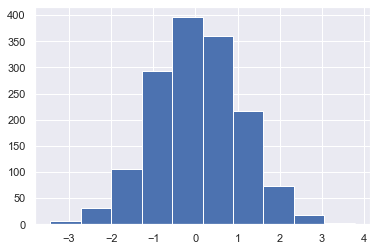

In [58]:
a = np.random.randn(len(datoscoke))
plt.hist(a)

In [59]:
feature_cols = ["grams","ships_from","quality","cost_per_gram_pure","rating"]
feature_colssimple = ["cost_per_gram_pure"]
from sklearn.linear_model import LinearRegression 

In [60]:
X=datoscoke[feature_cols]
Y=datoscoke["cost_per_gram"]

In [61]:
Xs=datoscoke[feature_colssimple]
Ys=datoscoke["cost_per_gram"]

In [62]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lmsimple = LinearRegression()
lmsimple.fit(Xs,Ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print (lm.intercept_)
print (lm.coef_)

-0.03690500395712479
[-3.99653583e-07 -3.04803716e-05  3.89174454e-04  8.69997971e-01
  6.22759958e-04]


In [65]:
print (lmsimple.intercept_)
print (lmsimple.coef_)

0.000740503332923817
[0.86211033]


In [66]:
list (zip(feature_cols, lm.coef_))

[('grams', -3.9965358253888345e-07),
 ('ships_from', -3.048037161706077e-05),
 ('quality', 0.0003891744539981762),
 ('cost_per_gram_pure', 0.869997970943568),
 ('rating', 0.0006227599577469941)]

In [67]:
list (zip(feature_colssimple, lmsimple.coef_))

[('cost_per_gram_pure', 0.8621103274740817)]

In [68]:
lm.score(X,Y)

0.9933983538512832

In [69]:
lmsimple.score(Xs,Ys)#rcuadrado

0.9717698330393927

In [70]:
#modelo
datoscoke["R_simple"]=lmsimple.predict(pd.DataFrame(datoscoke[feature_colssimple]))
datoscoke["R_mult"]=lm.predict(pd.DataFrame(datoscoke[feature_cols]))

#datoscoke["pred"] = -0.03690500395712479 + datoscoke['grams'] * -3.9965358253888345e-07 + datoscoke['ships_from']*-3.048037161706077e-05 +datoscoke['quality']*0.0003891744539981762 + datoscoke['cost_per_gram_pure']*0.869997970943568 + datoscoke['rating'] * 0.0006227599577469941

In [71]:
datoscoke.head(10)

cost_per_gram  ships_from  cost_per_gram_pure  quality  rating  grams  \
0       0.025770           1            0.028633     90.0    4.63    1.0   
1       0.025750           1            0.028611     90.0    4.63    2.0   
2       0.032980           1            0.037056     89.0    4.94    0.5   
3       0.041200           2            0.046292     89.0    5.00    1.0   
4       0.034000           1            0.039080     87.0    4.78    1.0   
5       0.027050           1            0.031092     87.0    4.78   10.0   
6       0.031150           1            0.035805     87.0    4.78    2.0   
7       0.029667           1            0.034100     87.0    4.78    3.0   
8       0.028340           1            0.032575     87.0    4.78    5.0   
9       0.023460           3            0.031280     75.0    4.93    0.5   

         vendor_name  successful_transactions  escrow  btc_price  R_simple  \
0       Mister-Molly                       90       1    0.02577  0.025426   
1       Mister-Molly                       90       1    0.05150  0.025406   
2      0ldamsterdamm                      620       1    0.01649  0.032687   
3     lhomme-masquer                       15       1    0.04120  0.040649   
4  SMOOTHCRIMINAL007                       28       1    0.03400  0.034432   
5  SMOOTHCRIMINAL007                       28       0    0.27050  0.027545   
6  SMOOTHCRIMINAL007                       28       0    0.06230  0.031608   
7  SMOOTHCRIMINAL007                       28       0    0.08900  0.030138   
8  SMOOTHCRIMINAL007                       28       0    0.14170  0.028823   
9          cocaineuk                      380       1    0.01173  0.027707   

     R_mult  
0  0.025884  
1  0.025864  
2  0.033016  
3  0.041058  
4  0.033899  
5  0.026945  
6  0.031049  
7  0.029565  
8  0.028237  
9  0.022475

### Comparación de modelos lineales

In [72]:
datoscoke[['cost_per_gram','R_simple','R_mult']].head(15)

cost_per_gram  R_simple    R_mult
0        0.025770  0.025426  0.025884
1        0.025750  0.025406  0.025864
2        0.032980  0.032687  0.033016
3        0.041200  0.040649  0.041058
4        0.034000  0.034432  0.033899
5        0.027050  0.027545  0.026945
6        0.031150  0.031608  0.031049
7        0.029667  0.030138  0.029565
8        0.028340  0.028823  0.028237
9        0.023460  0.027707  0.022475
10       0.019370  0.023006  0.017731
11       0.014643  0.017572  0.012242
12       0.032280  0.030034  0.032607
13       0.017600  0.020971  0.015677
14       0.013207  0.015922  0.010571

### Validación

(array([ 11.,  33.,  92., 264., 294., 337., 237., 142.,  66.,  28.]),
 array([-2.83324705, -2.29296422, -1.75268138, -1.21239854, -0.67211571,
        -0.13183287,  0.40844997,  0.9487328 ,  1.48901564,  2.02929848,
         2.56958132]),
 <a list of 10 Patch objects>)

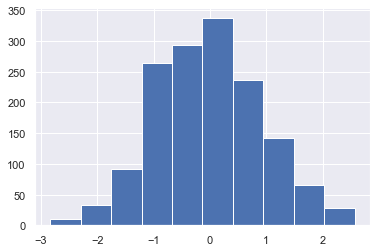

In [73]:
a = np.random.randn(len(datoscoke))#distribución uniforme con el mismo numero de elementos de mi dataset
plt.hist(a)

### Validación del modelo 

In [74]:
check = (a<0.8)
training =datoscoke[check]#conjunto de entrenamiento 80%
testing =datoscoke[~check]#conjunto de testing 20%

In [75]:
lm4= smf.ols(formula ="cost_per_gram ~ grams+ships_from+btc_price+quality+cost_per_gram_pure", data=training).fit()

In [76]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.993e+04
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        05:46:51   Log-Likelihood:                 6382.7
No. Observations:                1209   AIC:                        -1.275e+04
Df Residuals:                    1203   BIC:                        -1.272e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0325      0.001    -57.788      0.000      -0.034      -0.031
grams              -1.665e-07    5.1e-07     -0.327      0.744   -1.17e-06    8.33e-07
ships_from         -1.711e-05   1.54e-05     -1.113      0.266   -4.73e-05    1.31e-05
btc_price          -1.343e-05   3.37e-05     -0.398      0.690   -7.96e-05    5.27e-05
quality                0.0004    6.3e-06     58.855      0.000       0.000       0.000
cost_per_gram_pure     0.8760      0.002    424.441      0.000       0.872       0.880
==============================================================================
Omnibus:                     1481.782   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509665.197
Skew:                          -5.872   Prob(JB):                         0.00
Kurtosis:                     102.898   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
len(datoscoke)

1504

In [78]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(datoscoke, test_size=0.2)


In [79]:
len(train)

1203

In [80]:
lm5= smf.ols(formula ="cost_per_gram ~ grams+ships_from+btc_price+quality+cost_per_gram_pure", data=train).fit()

In [81]:
lm5.summary()#datos de entrenamiento

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.883e+04
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        05:46:52   Log-Likelihood:                 6260.6
No. Observations:                1203   AIC:                        -1.251e+04
Df Residuals:                    1197   BIC:                        -1.248e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0339      0.001    -59.280      0.000      -0.035      -0.033
grams              -5.716e-07   5.56e-07     -1.027      0.304   -1.66e-06     5.2e-07
ships_from         -2.119e-05   1.69e-05     -1.250      0.211   -5.44e-05    1.21e-05
btc_price           1.583e-05   3.69e-05      0.428      0.668   -5.66e-05    8.83e-05
quality                0.0004   6.39e-06     60.696      0.000       0.000       0.000
cost_per_gram_pure     0.8743      0.002    419.007      0.000       0.870       0.878
==============================================================================
Omnibus:                     1366.998   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           324956.958
Skew:                          -5.214   Prob(JB):                         0.00
Kurtosis:                      82.839   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
lm5test= smf.ols(formula ="cost_per_gram ~ grams+ships_from+btc_price+quality+cost_per_gram_pure", data=test).fit()
#datos de prueba

In [83]:
lm5test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6248.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):          7.23e-297
Time:                        05:46:52   Log-Likelihood:                 1622.3
No. Observations:                 301   AIC:                            -3233.
Df Residuals:                     295   BIC:                            -3210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0320      0.001    -32.951      0.000      -0.034      -0.030
grams               4.165e-07   1.26e-06      0.330      0.742   -2.07e-06     2.9e-06
ships_from         -2.049e-05    2.8e-05     -0.731      0.465   -7.57e-05    3.47e-05
btc_price          -7.067e-05    7.8e-05     -0.905      0.366      -0.000    8.29e-05
quality                0.0004   1.06e-05     35.799      0.000       0.000       0.000
cost_per_gram_pure     0.8368      0.005    164.898      0.000       0.827       0.847
==============================================================================
Omnibus:                      277.969   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16425.444
Skew:                          -3.386   Prob(JB):                         0.00
Kurtosis:                      38.550   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicción lineal multiple sin variable dominante.

In [84]:
feature_cols2 = ["grams","ships_from","quality","rating","btc_price","successful_transactions"]
from sklearn.linear_model import LinearRegression 

In [85]:
X2=datoscoke[feature_cols2]
Y2=datoscoke["cost_per_gram"]

In [86]:
lmsin = LinearRegression()
lmsin.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
print (lmsin.intercept_)
print (lmsin.coef_)

-0.044471594314892116
[-1.78070296e-05  1.54624641e-03  1.68862816e-04  1.13227047e-02
  4.04034984e-04  1.92707948e-06]


In [88]:
list (zip(feature_cols2, lmsin.coef_))

[('grams', -1.7807029606477013e-05),
 ('ships_from', 0.0015462464052158759),
 ('quality', 0.0001688628159707533),
 ('rating', 0.011322704668126543),
 ('btc_price', 0.00040403498428352746),
 ('successful_transactions', 1.9270794835979633e-06)]

In [89]:
lmsin.score(X2,Y2)#rcuadrado

0.1081128838542389

In [90]:
datoscoke["R_SinV"]=lmsin.predict(pd.DataFrame(datoscoke[feature_cols2]))


In [91]:
datoscoke.head(20)

cost_per_gram  ships_from  cost_per_gram_pure  quality  rating  grams  \
0        0.025770           1            0.028633     90.0    4.63    1.0   
1        0.025750           1            0.028611     90.0    4.63    2.0   
2        0.032980           1            0.037056     89.0    4.94    0.5   
3        0.041200           2            0.046292     89.0    5.00    1.0   
4        0.034000           1            0.039080     87.0    4.78    1.0   
5        0.027050           1            0.031092     87.0    4.78   10.0   
6        0.031150           1            0.035805     87.0    4.78    2.0   
7        0.029667           1            0.034100     87.0    4.78    3.0   
8        0.028340           1            0.032575     87.0    4.78    5.0   
9        0.023460           3            0.031280     75.0    4.93    0.5   
10       0.019370           3            0.025827     75.0    4.93    1.0   
11       0.014643           3            0.019524     75.0    4.93   14.0   
12       0.032280           3            0.033979     95.0    4.93    1.0   
13       0.017600           3            0.023467     75.0    4.93    2.0   
14       0.013207           3            0.017610     75.0    4.93   28.0   
15       0.030800           3            0.032421     95.0    4.93    2.0   
16       0.015914           3            0.021219     75.0    4.93    3.5   
17       0.029343           3            0.030887     95.0    4.93    3.5   
18       0.017720           3            0.023627     75.0    4.93    5.0   
19       0.015514           3            0.020686     75.0    4.93    7.0   

          vendor_name  successful_transactions  escrow  btc_price  R_simple  \
0        Mister-Molly                       90       1    0.02577  0.025426   
1        Mister-Molly                       90       1    0.05150  0.025406   
2       0ldamsterdamm                      620       1    0.01649  0.032687   
3      lhomme-masquer                       15       1    0.04120  0.040649   
4   SMOOTHCRIMINAL007                       28       1    0.03400  0.034432   
5   SMOOTHCRIMINAL007                       28       0    0.27050  0.027545   
6   SMOOTHCRIMINAL007                       28       0    0.06230  0.031608   
7   SMOOTHCRIMINAL007                       28       0    0.08900  0.030138   
8   SMOOTHCRIMINAL007                       28       0    0.14170  0.028823   
9           cocaineuk                      380       1    0.01173  0.027707   
10          cocaineuk                      380       1    0.01937  0.023006   
11          cocaineuk                      380       1    0.20500  0.017572   
12          cocaineuk                      380       1    0.03228  0.030034   
13          cocaineuk                      380       1    0.03520  0.020971   
14          cocaineuk                      380       1    0.36980  0.015922   
15          cocaineuk                      380       1    0.06160  0.028691   
16          cocaineuk                      380       1    0.05570  0.019034   
17          cocaineuk                      380       1    0.10270  0.027369   
18          cocaineuk                      380       1    0.08860  0.021109   
19          cocaineuk                      380       1    0.10860  0.018574   

      R_mult    R_SinV  
0   0.025884  0.024862  
1   0.025864  0.024855  
2   0.033016  0.029230  
3   0.041058  0.030291  
4   0.033899  0.025938  
5   0.026945  0.025873  
6   0.031049  0.025932  
7   0.029565  0.025925  
8   0.028237  0.025910  
9   0.022475  0.029381  
10  0.017731  0.029375  
11  0.012242  0.029219  
12  0.032607  0.032758  
13  0.015677  0.029364  
14  0.010571  0.029036  
15  0.031251  0.032752  
16  0.013721  0.029345  
17  0.029916  0.032742  
18  0.015815  0.029332  
19  0.013256  0.029304

In [92]:
datoscoke[['cost_per_gram','R_simple','R_mult','R_SinV']].head(15)

cost_per_gram  R_simple    R_mult    R_SinV
0        0.025770  0.025426  0.025884  0.024862
1        0.025750  0.025406  0.025864  0.024855
2        0.032980  0.032687  0.033016  0.029230
3        0.041200  0.040649  0.041058  0.030291
4        0.034000  0.034432  0.033899  0.025938
5        0.027050  0.027545  0.026945  0.025873
6        0.031150  0.031608  0.031049  0.025932
7        0.029667  0.030138  0.029565  0.025925
8        0.028340  0.028823  0.028237  0.025910
9        0.023460  0.027707  0.022475  0.029381
10       0.019370  0.023006  0.017731  0.029375
11       0.014643  0.017572  0.012242  0.029219
12       0.032280  0.030034  0.032607  0.032758
13       0.017600  0.020971  0.015677  0.029364
14       0.013207  0.015922  0.010571  0.029036

### Árbol de regresión

In [93]:
colnames=datoscoke.columns.values.tolist()
predictors=colnames[1:6]
target=colnames[0]
X1=datoscoke[predictors]
Y1=datoscoke[target]

In [94]:
predictors

['ships_from', 'cost_per_gram_pure', 'quality', 'rating', 'grams']

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
regtree= DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [97]:
regtree.fit(X1,Y1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [98]:
predics=regtree.predict(datoscoke[predictors])

In [99]:
datoscoke["Arbol"]=predics

In [100]:
#resultado = datoscoke[["predics","cost_per_gram"]]

In [101]:
datoscoke[['cost_per_gram','R_simple','R_mult','R_SinV','Arbol']].head(15)

cost_per_gram  R_simple    R_mult    R_SinV     Arbol
0        0.025770  0.025426  0.025884  0.024862  0.025672
1        0.025750  0.025406  0.025864  0.024855  0.025672
2        0.032980  0.032687  0.033016  0.029230  0.033109
3        0.041200  0.040649  0.041058  0.030291  0.041413
4        0.034000  0.034432  0.033899  0.025938  0.034863
5        0.027050  0.027545  0.026945  0.025873  0.026905
6        0.031150  0.031608  0.031049  0.025932  0.031465
7        0.029667  0.030138  0.029565  0.025925  0.030601
8        0.028340  0.028823  0.028237  0.025910  0.027617
9        0.023460  0.027707  0.022475  0.029381  0.022131
10       0.019370  0.023006  0.017731  0.029375  0.019339
11       0.014643  0.017572  0.012242  0.029219  0.016617
12       0.032280  0.030034  0.032607  0.032758  0.033233
13       0.017600  0.020971  0.015677  0.029364  0.015891
14       0.013207  0.015922  0.010571  0.029036  0.014825

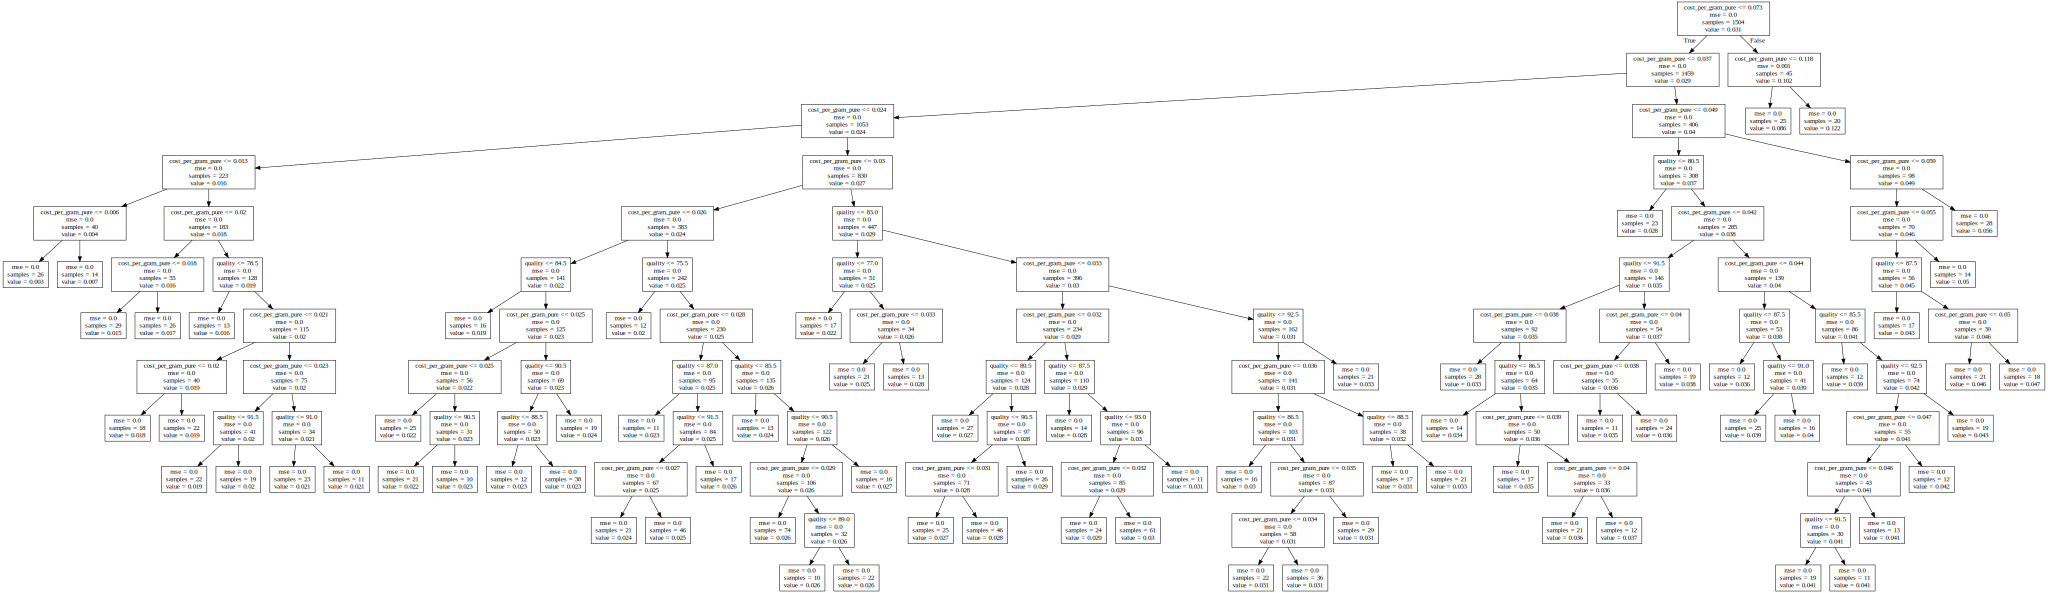

In [102]:
from sklearn.tree import export_graphviz
with open ("img/arbold_coca.dot","w") as dotfile:
    export_graphviz (regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

import os

from graphviz import Source
file= open("img/arbold_coca.dot","r")
text = file.read()
Source(text)

In [103]:
datoscokearbol = perico.loc[:, ["cost_per_gram","quality","rating","grams","successful_transactions","btc_price"]].copy()


In [104]:
colnamessvd=datoscokearbol.columns.values.tolist()
predictorssvd=colnamessvd[1:6]
targetsvd=colnamessvd[0]
X1svd=datoscoke[predictorssvd]
Y1svd=datoscoke[targetsvd]

In [105]:
predictorssvd

['quality', 'rating', 'grams', 'successful_transactions', 'btc_price']

In [106]:
regtreesvd= DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [107]:
regtreesvd.fit(X1svd,Y1svd)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [108]:
list(zip(predictorssvd,regtreesvd.feature_importances_))

[('quality', 0.0017595670500573084),
 ('rating', 0.00933866474323037),
 ('grams', 0.3237384399410198),
 ('successful_transactions', 0.009989188746468189),
 ('btc_price', 0.6551741395192242)]

In [109]:
predicssvd=regtree.predict(datoscokearbol[predictorssvd])

In [110]:
#datoscoke[['cost_per_gram','R_simple','R_mult','R_SinV','Arbol','predicssvd']].head(15)

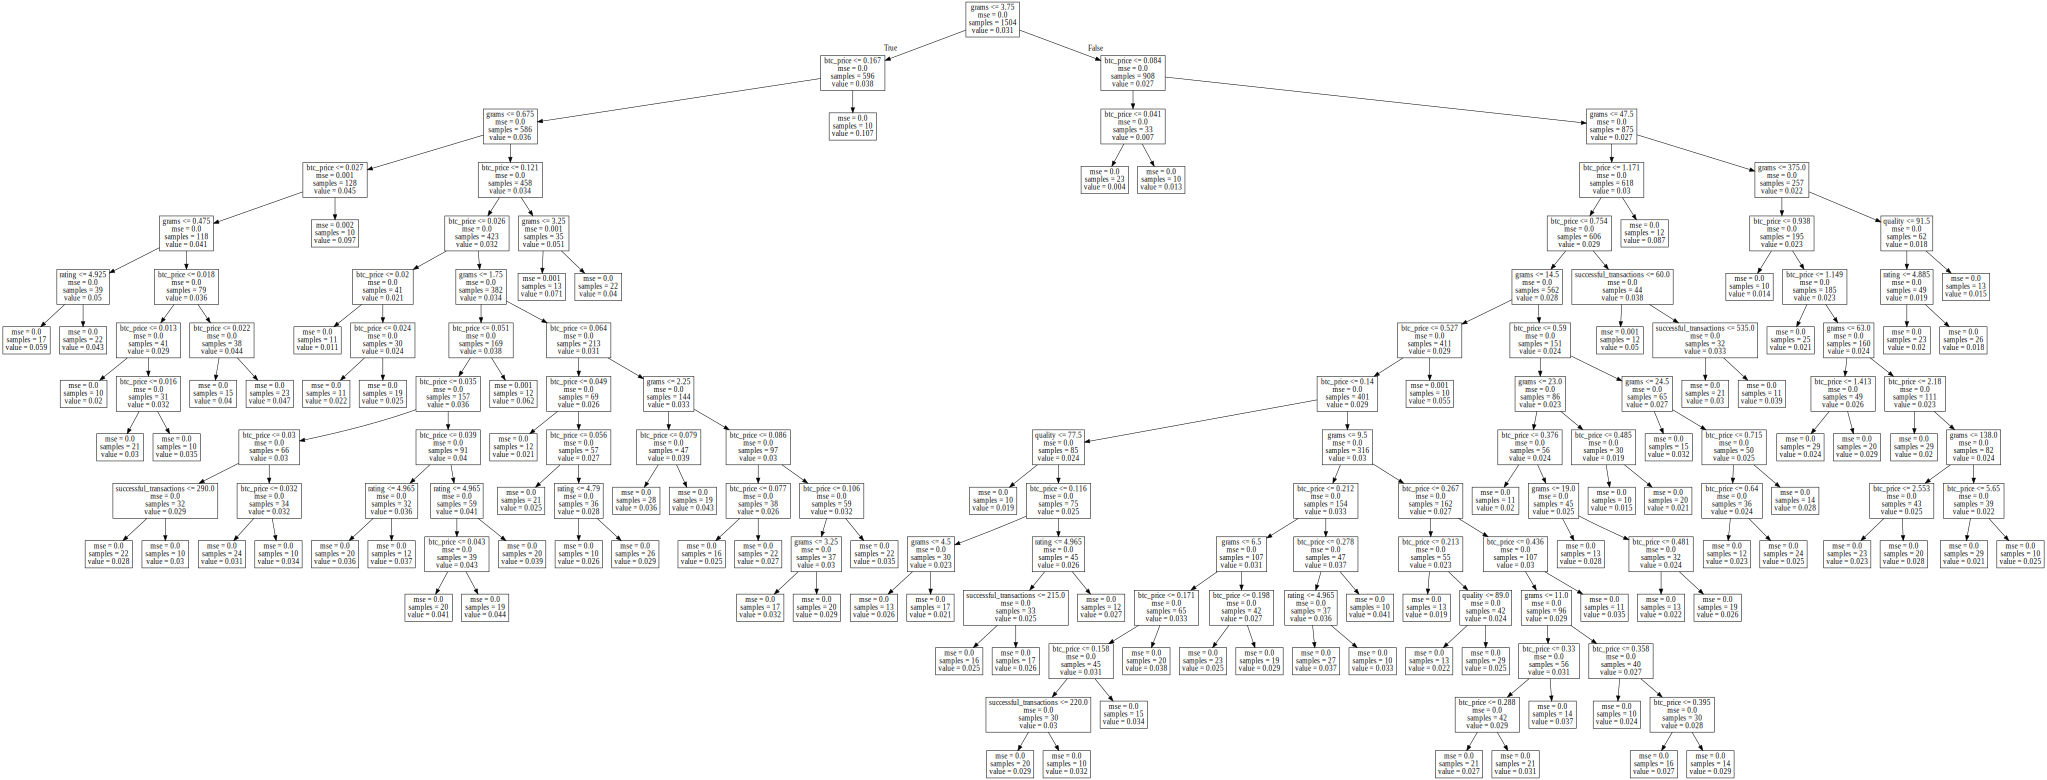

In [111]:
from sklearn.tree import export_graphviz
with open ("img/arbold_coca.dot","w") as dotfile:
    export_graphviz (regtreesvd, out_file=dotfile, feature_names=predictorssvd)
    dotfile.close()

import os

from graphviz import Source
file= open("img/arbold_coca.dot","r")
text = file.read()
Source(text)

In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import 


In [113]:
k_fold = KFold(n_splits=10,shuffle=True,random_state=1)

In [114]:

print (k_fold)

KFold(n_splits=10, random_state=1, shuffle=True)


In [115]:
scores= cross_val_score (regtree, X1, Y1, scoring ="neg_mean_squared_error",cv=5, n_jobs=1)
print (scores)
score= np.mean(scores)

print ( "score",score)



[-2.22563847e-05 -5.77480036e-06 -7.05239899e-06 -4.11089186e-06
 -2.20458260e-05]
score -1.2248060385264194e-05


In [116]:
list(zip(predictors,regtree.feature_importances_))

[('ships_from', 0.0),
 ('cost_per_gram_pure', 0.9872496495566033),
 ('quality', 0.01275035044339663),
 ('rating', 0.0),
 ('grams', 0.0)]

In [117]:
from sklearn.metrics import accuracy_score

#score1 = accuracy_score ()

### Observación

Al momento de construir los modelos de regresión es notable el impacto de la variable dominante "cost_per_gram_pure" 

- ¿Qué sucede entonces con las otras variables?
Según el comportamiento en el mundo real, el costo por gramo debería estar influenciado además del costo por gramo puro
de otras variables.


- Variables como la calidad
En el mundo real mayor calidad implica un mayor costo por gramo. ¿Por qué en el sitio no?


- El costo por gramo parece ser una de las principales variables que rigen las transacciones en el sitio.

#### Aprendizaje no supervisado 
Aprendizaje no supervisado es un método de Aprendizaje Automático donde un modelo se ajusta a las observaciones. Se distingue del Aprendizaje supervisado por el hecho de que no hay un conocimiento a priori.

# Clustering 

In [118]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix

### Matriz de distancias
- Matriz dependiente de una variable

In [119]:
matrizSimple =  datoscoke.loc[:, ["vendor_name", "rating"]].copy()
vars =matrizSimple.columns.values.tolist()[1:4]
vars

['rating']

In [120]:
matrizSimple.head(5)

vendor_name  rating
0       Mister-Molly    4.63
1       Mister-Molly    4.63
2      0ldamsterdamm    4.94
3     lhomme-masquer    5.00
4  SMOOTHCRIMINAL007    4.78

In [121]:
ddsimple=distance_matrix(matrizSimple[vars],matrizSimple[vars],p=1)

In [122]:
def dm_to_df2 (dd,col_name):
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [123]:
matrizSimplecompleta=dm_to_df2 (ddsimple, matrizSimple["vendor_name"])
matrizSimplecompleta

vendor_name        Mister-Molly  Mister-Molly  0ldamsterdamm  lhomme-masquer  \
vendor_name                                                                    
Mister-Molly               0.00          0.00           0.31            0.37   
Mister-Molly               0.00          0.00           0.31            0.37   
0ldamsterdamm              0.31          0.31           0.00            0.06   
lhomme-masquer             0.37          0.37           0.06            0.00   
SMOOTHCRIMINAL007          0.15          0.15           0.16            0.22   
...                         ...           ...            ...             ...   
gomorraamsterdam           0.23          0.23           0.08            0.14   
gomorraamsterdam           0.23          0.23           0.08            0.14   
gomorraamsterdam           0.23          0.23           0.08            0.14   
gomorraamsterdam           0.23          0.23           0.08            0.14   
gomorraamsterdam           0.23          0.23           0.08            0.14   

vendor_name        SMOOTHCRIMINAL007  SMOOTHCRIMINAL007  SMOOTHCRIMINAL007  \
vendor_name                                                                  
Mister-Molly                    0.15               0.15               0.15   
Mister-Molly                    0.15               0.15               0.15   
0ldamsterdamm                   0.16               0.16               0.16   
lhomme-masquer                  0.22               0.22               0.22   
SMOOTHCRIMINAL007               0.00               0.00               0.00   
...                              ...                ...                ...   
gomorraamsterdam                0.08               0.08               0.08   
gomorraamsterdam                0.08               0.08               0.08   
gomorraamsterdam                0.08               0.08               0.08   
gomorraamsterdam                0.08               0.08               0.08   
gomorraamsterdam                0.08               0.08               0.08   

vendor_name        SMOOTHCRIMINAL007  SMOOTHCRIMINAL007  cocaineuk  ...  \
vendor_name                                                         ...   
Mister-Molly                    0.15               0.15       0.30  ...   
Mister-Molly                    0.15               0.15       0.30  ...   
0ldamsterdamm                   0.16               0.16       0.01  ...   
lhomme-masquer                  0.22               0.22       0.07  ...   
SMOOTHCRIMINAL007               0.00               0.00       0.15  ...   
...                              ...                ...        ...  ...   
gomorraamsterdam                0.08               0.08       0.07  ...   
gomorraamsterdam                0.08               0.08       0.07  ...   
gomorraamsterdam                0.08               0.08       0.07  ...   
gomorraamsterdam                0.08               0.08       0.07  ...   
gomorraamsterdam                0.08               0.08       0.07  ...   

vendor_name        gomorraamsterdam  gomorraamsterdam  gomorraamsterdam  \
vendor_name                                                               
Mister-Molly                   0.23              0.23              0.23   
Mister-Molly                   0.23              0.23              0.23   
0ldamsterdamm                  0.08              0.08              0.08   
lhomme-masquer                 0.14              0.14              0.14   
SMOOTHCRIMINAL007              0.08              0.08              0.08   
...                             ...               ...               ...   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0

In [124]:
matriz = datoscoke.loc[:, ["vendor_name","quality", "rating", "successful_transactions"]].copy()
vars=matriz.columns.values.tolist()[1:4]
vars

['quality', 'rating', 'successful_transactions']

In [125]:
matriz.head()

vendor_name  quality  rating  successful_transactions
0       Mister-Molly     90.0    4.63                       90
1       Mister-Molly     90.0    4.63                       90
2      0ldamsterdamm     89.0    4.94                      620
3     lhomme-masquer     89.0    5.00                       15
4  SMOOTHCRIMINAL007     87.0    4.78                       28

In [126]:
dd1=distance_matrix(matriz[vars],matriz[vars],p=1)

In [127]:
def dm_to_df(dd,col_name):
    return pd.DataFrame(dd, index=col_name, columns=col_name)

### Matriz de distancias entre vendedores con multiples variables

In [128]:
matrizcompleta=dm_to_df (dd1, matriz["vendor_name"])
matrizcompleta

vendor_name        Mister-Molly  Mister-Molly  0ldamsterdamm  lhomme-masquer  \
vendor_name                                                                    
Mister-Molly               0.00          0.00         531.31           76.37   
Mister-Molly               0.00          0.00         531.31           76.37   
0ldamsterdamm            531.31        531.31           0.00          605.06   
lhomme-masquer            76.37         76.37         605.06            0.00   
SMOOTHCRIMINAL007         65.15         65.15         594.16           15.22   
...                         ...           ...            ...             ...   
gomorraamsterdam         272.23        272.23         263.08          348.14   
gomorraamsterdam         272.23        272.23         263.08          348.14   
gomorraamsterdam         272.23        272.23         263.08          348.14   
gomorraamsterdam         272.23        272.23         263.08          348.14   
gomorraamsterdam         272.23        272.23         263.08          348.14   

vendor_name        SMOOTHCRIMINAL007  SMOOTHCRIMINAL007  SMOOTHCRIMINAL007  \
vendor_name                                                                  
Mister-Molly                   65.15              65.15              65.15   
Mister-Molly                   65.15              65.15              65.15   
0ldamsterdamm                 594.16             594.16             594.16   
lhomme-masquer                 15.22              15.22              15.22   
SMOOTHCRIMINAL007               0.00               0.00               0.00   
...                              ...                ...                ...   
gomorraamsterdam              337.08             337.08             337.08   
gomorraamsterdam              337.08             337.08             337.08   
gomorraamsterdam              337.08             337.08             337.08   
gomorraamsterdam              337.08             337.08             337.08   
gomorraamsterdam              337.08             337.08             337.08   

vendor_name        SMOOTHCRIMINAL007  SMOOTHCRIMINAL007  cocaineuk  ...  \
vendor_name                                                         ...   
Mister-Molly                   65.15              65.15     305.30  ...   
Mister-Molly                   65.15              65.15     305.30  ...   
0ldamsterdamm                 594.16             594.16     254.01  ...   
lhomme-masquer                 15.22              15.22     379.07  ...   
SMOOTHCRIMINAL007               0.00               0.00     364.15  ...   
...                              ...                ...        ...  ...   
gomorraamsterdam              337.08             337.08      37.07  ...   
gomorraamsterdam              337.08             337.08      37.07  ...   
gomorraamsterdam              337.08             337.08      37.07  ...   
gomorraamsterdam              337.08             337.08      37.07  ...   
gomorraamsterdam              337.08             337.08      37.07  ...   

vendor_name        gomorraamsterdam  gomorraamsterdam  gomorraamsterdam  \
vendor_name                                                               
Mister-Molly                 272.23            272.23            272.23   
Mister-Molly                 272.23            272.23            272.23   
0ldamsterdamm                263.08            263.08            263.08   
lhomme-masquer               348.14            348.14            348.14   
SMOOTHCRIMINAL007            337.08            337.08            337.08   
...                             ...               ...               ...   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0.00   
gomorraamsterdam               0.00              0.00              0

In [129]:
molly=matriz.loc[matriz['vendor_name'] == "Mister-Molly"]
molly.head()

vendor_name  quality  rating  successful_transactions
0    Mister-Molly     90.0    4.63                       90
1    Mister-Molly     90.0    4.63                       90
261  Mister-Molly     90.0    4.63                       90
305  Mister-Molly     90.0    4.63                       90
346  Mister-Molly     90.0    4.63                       90

In [130]:
matriz.loc[matriz['vendor_name'] == "Mister-Molly"].mean()

quality                    90.00
rating                      4.63
successful_transactions    90.00
dtype: float64

In [131]:
gof=matriz.loc[matriz['vendor_name'] == "0ldamsterdamm"]
gof.head()

vendor_name  quality  rating  successful_transactions
2    0ldamsterdamm     89.0    4.94                      620
253  0ldamsterdamm     89.0    4.94                      620
288  0ldamsterdamm     89.0    4.94                      620
409  0ldamsterdamm     89.0    4.94                      620
414  0ldamsterdamm     89.0    4.94                      620

In [132]:
matriz.loc[matriz['vendor_name'] == "0ldamsterdamm"].mean()

quality                     89.00
rating                       4.94
successful_transactions    620.00
dtype: float64

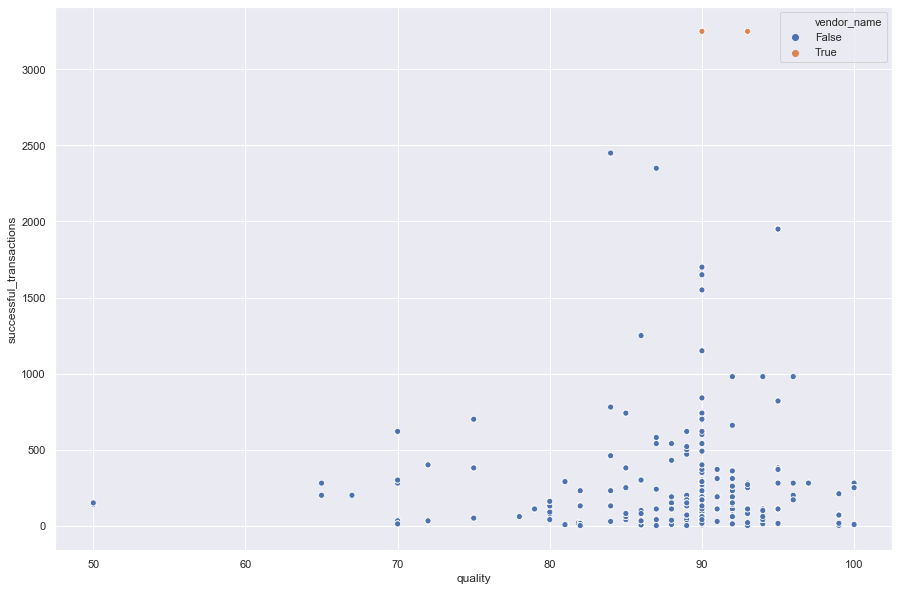

In [133]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=datoscoke['quality'], y=datoscoke['successful_transactions'],hue =datoscoke['vendor_name']=="Gofastteam") 

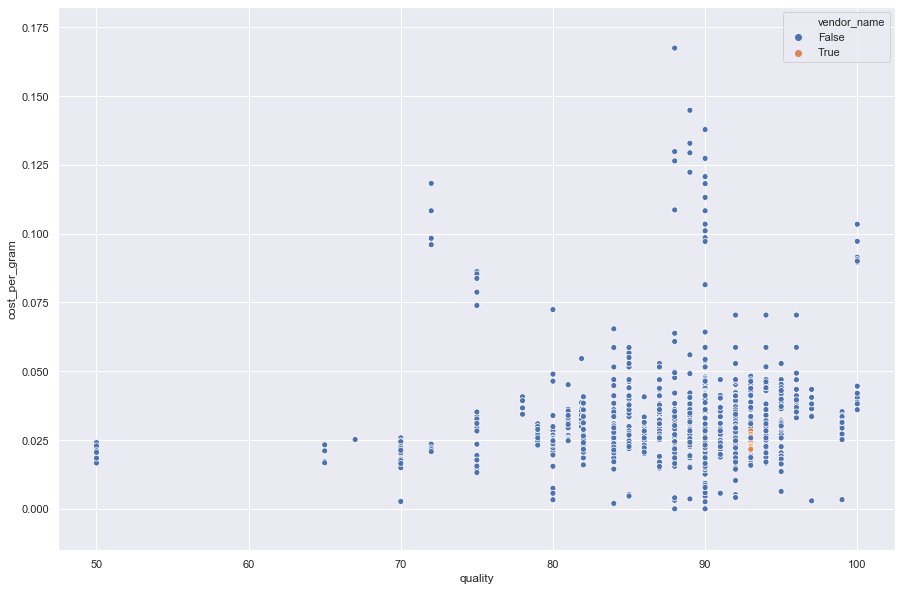

In [134]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=datoscoke['quality'], y=datoscoke['cost_per_gram'],hue =datoscoke['vendor_name']=="Gofastteam")

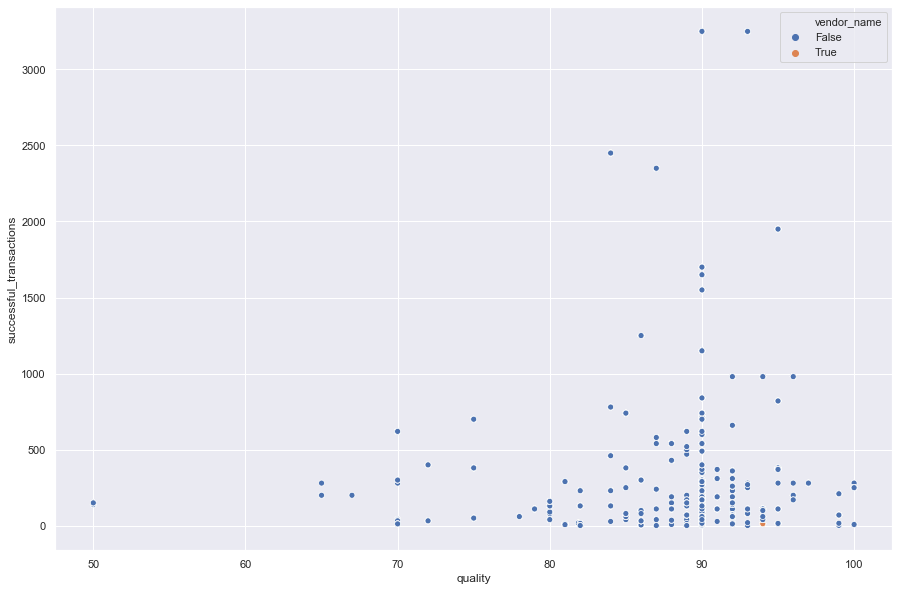

In [135]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=datoscoke['quality'], y=datoscoke['successful_transactions'],hue =datoscoke['vendor_name']=="TheCoffeeShop") 

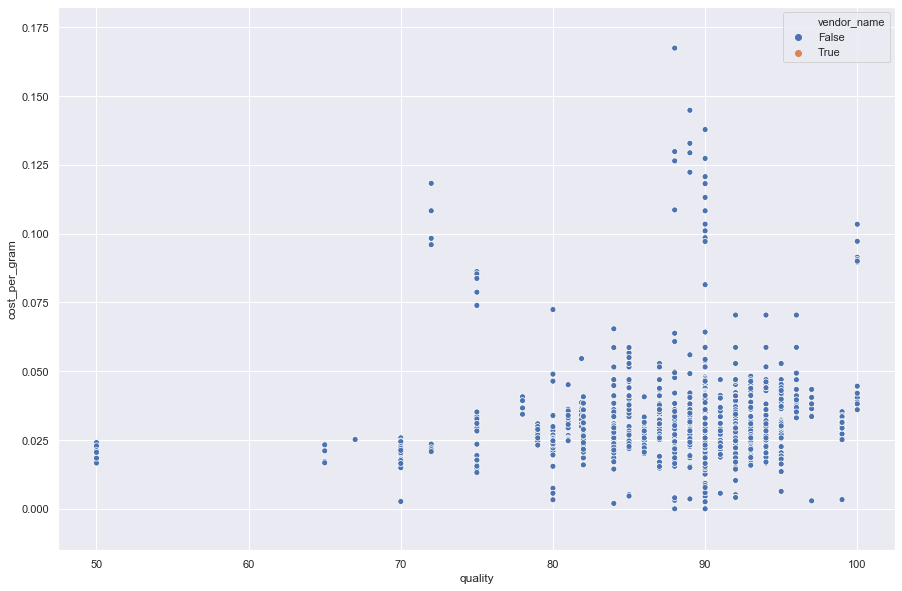

In [136]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=datoscoke['quality'], y=datoscoke['cost_per_gram'],hue =datoscoke['vendor_name']=="TheCoffeeShop") 

### dendrograma

In [137]:
Y2=linkage (matriz[vars],"ward")
Y2

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.61000000e+02, 1.50400000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 2.53000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.88200000e+03, 3.00100000e+03, 7.04289693e+03, 7.10000000e+01],
       [3.00200000e+03, 3.00300000e+03, 1.11956824e+04, 1.43300000e+03],
       [3.00400000e+03, 3.00500000e+03, 2.43934313e+04, 1.50400000e+03]])

(array([1067.,  248.,   77.,   41.,    6.,   27.,    0.,   17.,    0.,
          21.]),
 array([1.0000e+00, 3.2590e+02, 6.5080e+02, 9.7570e+02, 1.3006e+03,
        1.6255e+03, 1.9504e+03, 2.2753e+03, 2.6002e+03, 2.9251e+03,
        3.2500e+03]),
 <a list of 10 Patch objects>)

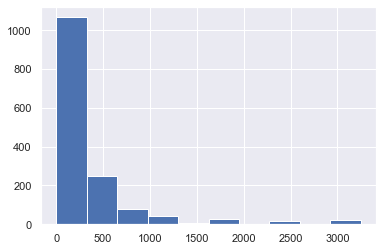

In [138]:
plt.hist(matriz["successful_transactions"])

In [139]:
from sklearn.cluster import AgglomerativeClustering

In [140]:
jerarquia = datoscoke.loc[:, [ "quality"]].copy()


In [141]:
jerarquia.head()

quality
0     90.0
1     90.0
2     89.0
3     89.0
4     87.0

In [142]:
clust=AgglomerativeClustering(n_clusters=6, linkage="ward").fit(jerarquia) # creamos 6 clusters

In [143]:
md=pd.Series(clust.labels_)#obtencion de las etiquetas 

Text(0, 0.5, 'freq. de coca cluster')

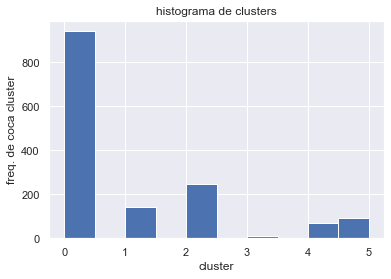

In [144]:
plt.hist(md)
plt.title("histograma de clusters")
plt.xlabel("cluster")
plt.ylabel ("freq. de coca cluster")

In [145]:
#jerarquia.groupby("successful_transactions").mean()

In [146]:
jerarquia_norm=(jerarquia-jerarquia.min())/(jerarquia.max()-jerarquia.min())
jerarquia_norm.head()

quality
0     0.80
1     0.80
2     0.78
3     0.78
4     0.74

In [147]:
clust2=AgglomerativeClustering(n_clusters=2, linkage="ward").fit(jerarquia_norm) # creamos 6 clusters

In [148]:
etiquetas=pd.Series(clust2.labels_)

Text(0.5, 0, 'cluster')

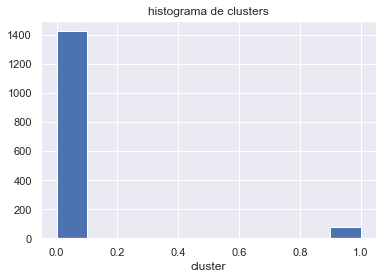

In [149]:
plt.hist(etiquetas)
plt.title ("histograma de clusters")
plt.xlabel("cluster")


In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [151]:
z=linkage(jerarquia_norm, "ward")
z

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 1.50400000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.60100000e+03, 2.99800000e+03, 1.80870071e+00, 7.90000000e+01],
       [3.00200000e+03, 3.00300000e+03, 3.02588223e+00, 1.42500000e+03],
       [3.00400000e+03, 3.00500000e+03, 5.06926587e+00, 1.50400000e+03]])

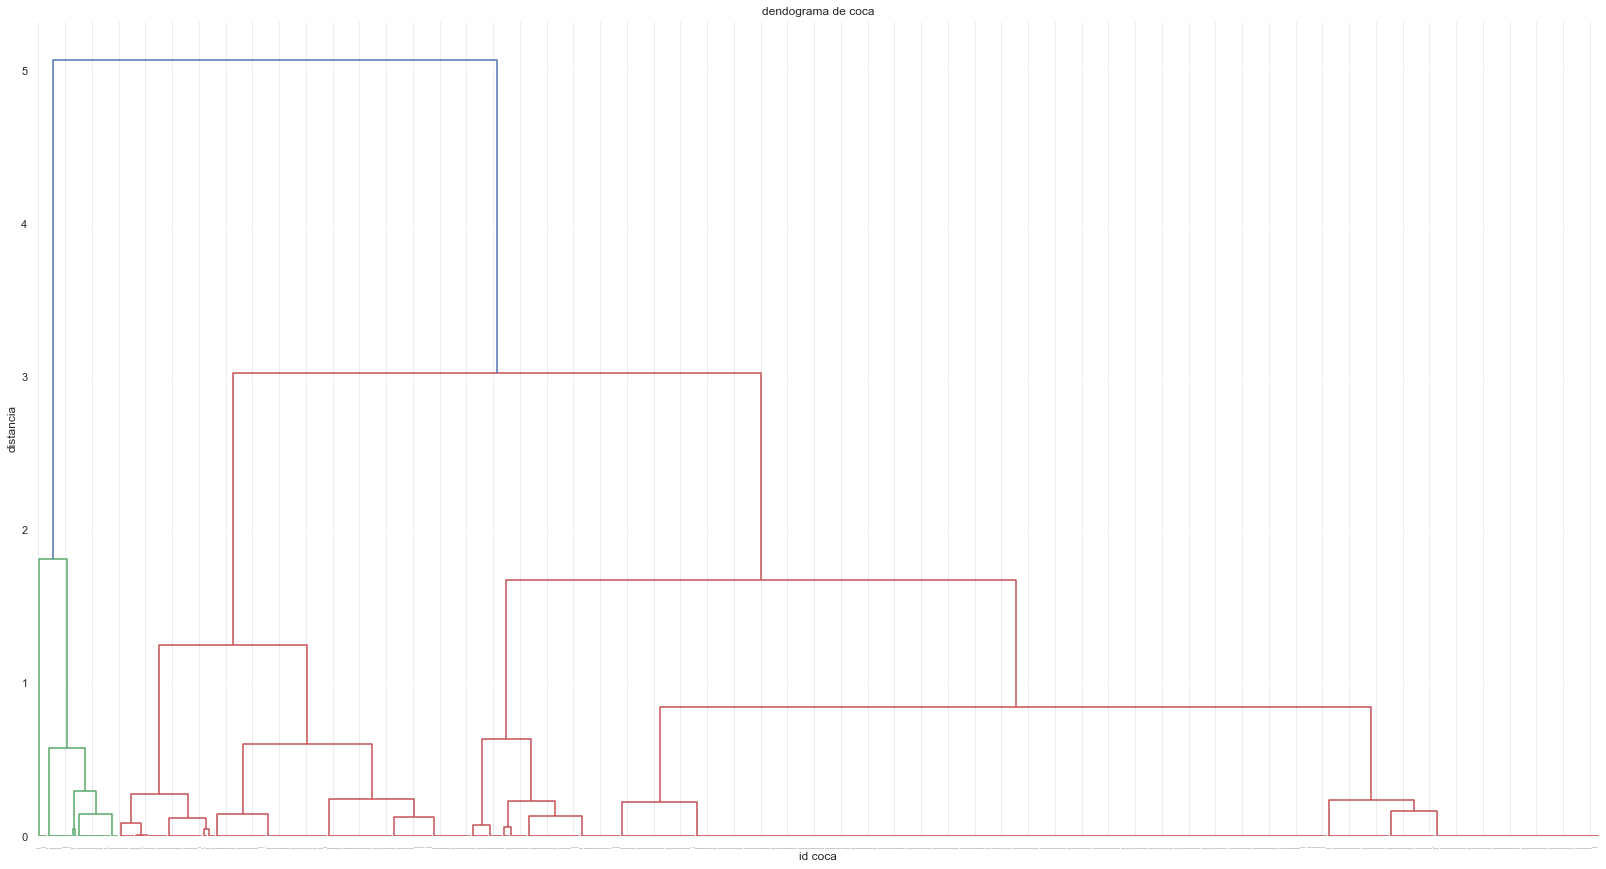

In [152]:
plt.figure (figsize = (28,15))
plt.title("dendograma de coca")
plt.xlabel("id coca")
plt.ylabel("distancia")
dendrogram(z, leaf_rotation=90.,leaf_font_size=1.0)
plt.show()

### K-MEANS

In [153]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [154]:
model =KMeans (n_clusters=4)
model.fit (jerarquia_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [155]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
md_k = pd.Series (model.labels_)

In [157]:
km = datoscoke.loc[:, [ "quality","successful_transactions"]].copy()
km_norm=(km-km.min())/(km.max()-km.min())
#clustcoca2=clustcoca
#clustcoca_norm["clust_jera"]=md
km_norm["clust_k"]=md_k

In [158]:
km_norm.head(10)

quality  successful_transactions  clust_k
0     0.80                 0.027393        0
1     0.80                 0.027393        0
2     0.78                 0.190520        0
3     0.78                 0.004309        0
4     0.74                 0.008310        2
5     0.74                 0.008310        2
6     0.74                 0.008310        2
7     0.74                 0.008310        2
8     0.74                 0.008310        2
9     0.50                 0.116651        1

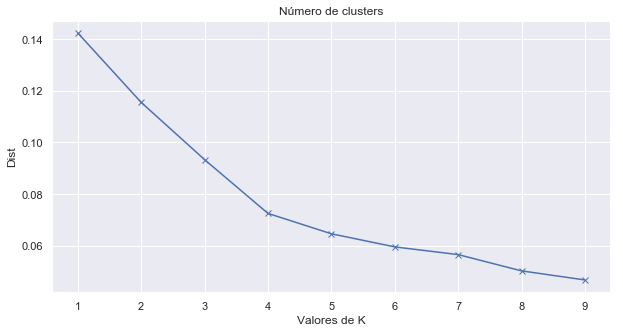

In [159]:
Image (filename="img/codo.png", width=800, height=800)

(array([1145.,    0.,    0.,   69.,    0.,    0.,  280.,    0.,    0.,
          10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

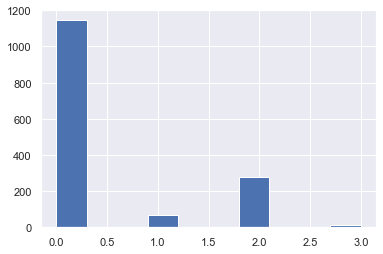

In [160]:
plt.hist(md_k)


In [161]:
kas=km_norm.groupby("clust_k").mean()
kas.head()

quality  successful_transactions
clust_k                                   
0        0.820664                 0.103005
1        0.432754                 0.097542
2        0.676271                 0.113416
3        0.000000                 0.044321

In [162]:
km_norm3.head(10)

NameError: name 'km_norm3' is not defined

In [ ]:
import plotly.graph_objs as go

trace0 = go.Scatter(x=km_norm[km_norm.clust_k==0]["quality"],
                    y=km_norm[km_norm.clust_k==0]["successful_transactions"],
                    name="cluster 0",
                    mode="markers",
                    marker=dict(size=10,
                              color= "rgba(15, 152, 152, 0.5)",
                              line=dict(width =1, color ="rgb(0,0,0)")))

trace1 = go.Scatter(x=km_norm[km_norm.clust_k==1]["quality"],
                    y=km_norm[km_norm.clust_k==1]["successful_transactions"],
                    name="cluster 1",
                    mode="markers",
                    marker=dict(size=10,
                              color= "rgba(120, 50, 50, 0.5)",
                              line=dict(width =1, color ="rgb(0,0,0)")))

trace2 = go.Scatter(x=km_norm[km_norm.clust_k==2]["quality"],
                    y=km_norm[km_norm.clust_k==2]["successful_transactions"],
                    name="cluster 2",
                    mode="markers",
                    marker=dict(size=10,
                              color= "rgba(330, 50, 50, 0.5)",
                              line=dict(width =1, color ="rgb(0,0,0)")))

trace3 = go.Scatter(x=km_norm[km_norm.clust_k==3]["quality"],
                    y=km_norm[km_norm.clust_k==3]["successful_transactions"],
                    name="cluster 3",
                    mode="markers",
                    marker=dict(size=10,
                              color= "rgba(330, 50, 50, 0.5)",
                              line=dict(width =1, color ="rgb(0,0,0)")))
                       


In [ ]:
import chart_studio.plotly
from chart_studio.plotly import plot, iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [ ]:
data =[trace0,trace1,trace2,trace3]
iplot(data)

In [ ]:
Image (filename="img/quality.png", width=800, height=800)

In [ ]:
kmcodo=datoscoke.loc[:, [ "quality","successful_transactions"]].copy()
kmcodo.head()


In [ ]:
km2=(kmcodo-kmcodo.min())/(kmcodo.max()-kmcodo.min())
km2.head()

In [ ]:
matriz=km2.as_matrix()

In [ ]:
matriz

In [ ]:

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]) 
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]) 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
  

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(matriz) 
    kmeanModel.fit(matriz)     
      
    distortions.append(sum(np.min(cdist(matriz, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / matriz.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(matriz, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / matriz.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Valores de K') 
plt.ylabel('Dist') 
plt.title('Número de clusters') 
plt.show() 

### k-MEANS  (Rating -  successful_transactions)

In [ ]:
jerarquia2 = datoscoke.loc[:, [ "rating"]].copy()
jerarquia_norm2=(jerarquia2-jerarquia2.min())/(jerarquia2.max()-jerarquia2.min())


In [ ]:
jerarquia_norm2.head()

In [ ]:
model2 =KMeans (n_clusters=2)
model2.fit (jerarquia_norm2)

In [ ]:
model.labels_

In [ ]:
md_k33 = pd.Series (model.labels_)

In [ ]:
km3 = datoscoke.loc[:, [ "successful_transactions","rating"]].copy()
km_norm3=(km3-km3.min())/(km3.max()-km3.min())
#clustcoca2=clustcoca
#clustcoca_norm["clust_jera"]=md
km_norm3["clust_krat"]=md_k33

In [ ]:
km_norm3.head()

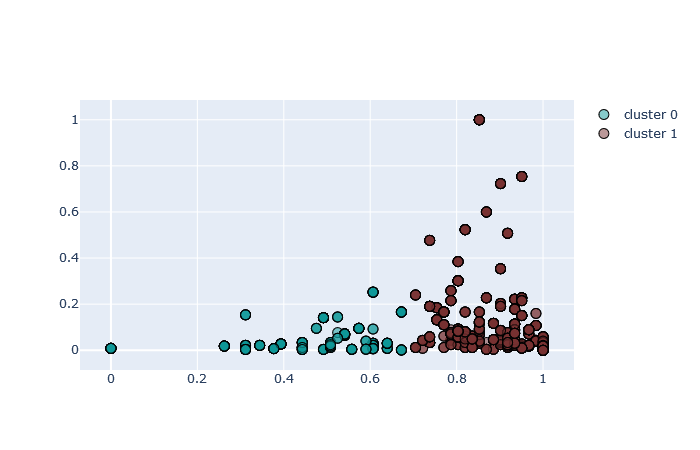

In [170]:
Image (filename="img/rs.png", width=1000, height=1000)

### Usuarios

¿De qué depende entonces que un usuario tenga un alto numero de transacciones exitosas?


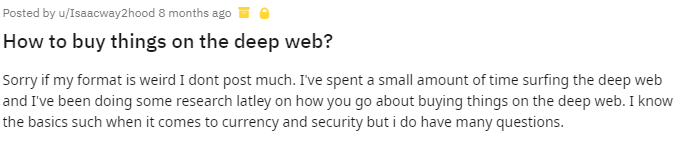

In [164]:
Image (filename="img/pregunta.jpg", width=800, height=800)

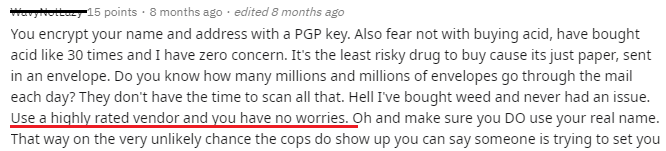

In [165]:
Image (filename="img/compras.jpg", width=800, height=800)

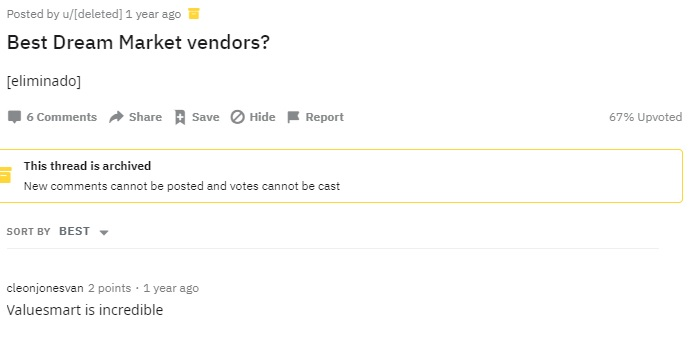

In [166]:
Image (filename="img/vendedores.jpg", width=800, height=800)

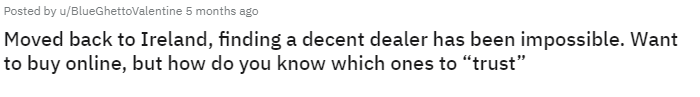

In [167]:
Image (filename="img/trust.png", width=800, height=800)

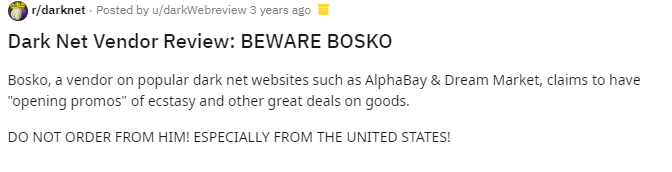

In [168]:
Image (filename="img/scam.png", width=800, height=800)

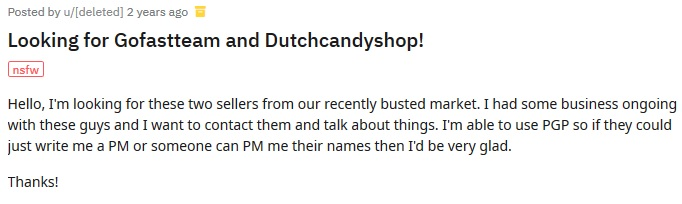

In [169]:
Image (filename="img/goff.jpg", width=800, height=800)